<a href="https://colab.research.google.com/github/JSEFERINO/JHSERIES2/blob/main/16_Series_Tiempo_Cap14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio Series de Tiempo por Julio Hurtado Márquez**
## **Text: Time Series Forecasting in Python - MARCO PEIXEIRO**
# **Parte 3. Predicciones a gran escala con aprendizaje profundo**

## **Introducción**
+ Los modelos estadísticos tienen sus limitaciones, especialmente cuando un conjunto de datos es grande y tiene muchas características y relaciones no lineales.
+ En tales casos, el aprendizaje profundo es la herramienta perfecta para la previsión de series temporales.
+ En esta parte del libro, trabajaremos con un conjunto de datos masivo y aplicaremos diferentes arquitecturas de aprendizaje profundo, como **la memoria a corto plazo larga (LSTM), una red neuronal convolucional (CNN) y una red neuronal profunda autorregresiva, para predecir el futuro de nuestra serie**.
+ Nuevamente, concluiremos esta parte con un proyecto final para poner a prueba sus habilidades.
+ El aprendizaje profundo es un subconjunto del aprendizaje automático y, por lo tanto, es posible utilizar algoritmos de aprendizaje automático más tradicionales para la previsión de series temporales, como **árboles potenciados por gradiente**.
+ Para mantener esta sección razonable, no cubriremos esas técnicas específicamente, aunque se requiere la creación de ventanas de datos para pronosticar series temporales con aprendizaje automático, y aplicaremos este concepto numerosas veces.


# **14. Pequeños pasos con el aprendizaje profundo**

## **Esta parte de Este capítulo cubre**
+ Implementación de modelos lineales
+ Implementación de redes neuronales profundas

## **implementaremos modelos lineales y redes neuronales para hacer pronosticos**
+ En el último capítulo, implementamos la clase DataWindow, que nos permite crear rápidamente ventanas de datos para construir modelos de un solo paso, modelos de varios pasos y modelos de múltiples salidas.
+ Con este componente crucial en su lugar, desarrollamos los modelos de referencia que servirán como puntos de referencia para nuestros modelos más complejos, que comenzaremos a construir en este capítulo.
+ Específicamente, implementaremos modelos lineales y redes neuronales profundas.
+ **Un modelo lineal es un caso especial de una red neuronal, donde no hay una capa oculta**.
+ Este modelo simplemente calcula pesos para cada variable de entrada con el fin de generar una predicción para el objetivo.
+ Por el contrario, **una red neuronal profunda tiene al menos una capa oculta, lo que nos permite comenzar a modelar relaciones no lineales entre las características y el objetivo, lo que generalmente da como resultado mejores pronósticos**.
+ En este capítulo, continuaremos el trabajo que comenzamos en el capítulo 13.
+ Te recomiendo que continúes codificando en el mismo cuaderno o scripts de Python que en el capítulo anterior, para que puedas comparar el rendimiento de estos modelos lineales y redes neuronales profundas con el de los modelos de referencia del capítulo 13.
+ También seguiremos trabajando con el mismo conjunto de datos que antes, y nuestra variable objetivo seguirá siendo el volumen de tráfico tanto para los modelos de un solo paso como para los de varios pasos.
+ Para el modelo de múltiples salidas, mantendremos la temperatura y el volumen de tráfico como nuestros objetivos.

# **13.1 Creación de ventanas de datos**
+ Comenzaremos creando la clase DataWindow, que nos permitirá formatear los datos de manera adecuada para que se introduzcan en nuestros modelos de aprendizaje profundo.
+ También agregaremos un método de trazado a esta clase para que podamos visualizar las predicciones y los valores reales.
+ Sin embargo, antes de sumergirnos en el código y crear la clase DataWindow, es importante comprender por qué debemos crear ventanas de datos para el aprendizaje profundo.
+ Los modelos de aprendizaje profundo tienen una forma particular de ajustar los datos, que exploraremos en la siguiente sección. Luego, avanzaremos e implementaremos la clase DataWindow.

# **14.1 Implementación de un modelo lineal**
+ Un modelo lineal es la arquitectura más simple que podemos implementar en el aprendizaje profundo.
+ De hecho, podríamos argumentar que no es aprendizaje profundo en absoluto, ya que el modelo no tiene una capa oculta.
+ A cada característica de entrada simplemente se le asigna un peso y se combinan para generar una predicción para el objetivo, al igual que en una regresión lineal tradicional.
+ Consideremos un modelo de un solo paso como ejemplo.
+ Recordemos que tenemos las siguientes características en nuestro conjunto de datos: `temperatura, cobertura de nubes, volumen de tráfico y day_sin y day_cos`, que codifican la hora del día como valores numéricos.
+ Un modelo lineal simplemente toma todas las características, calcula un peso para cada una de ellas y las suma para generar una predicción para el siguiente paso de tiempo. Este proceso se ilustra en la figura 14.1.

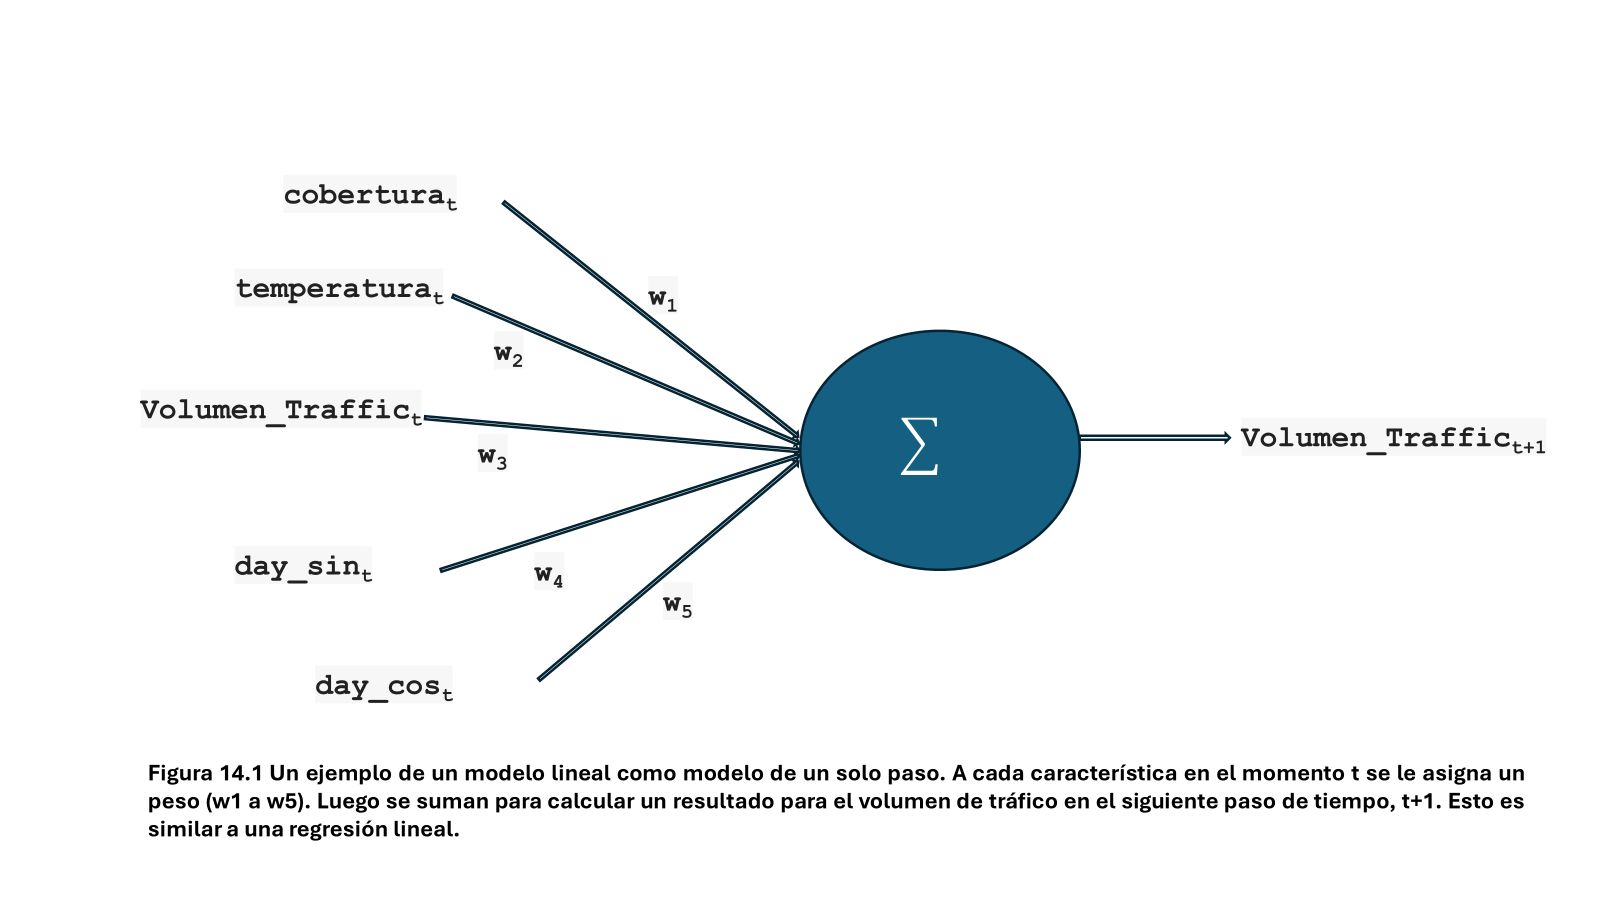


### **El modelo de la figura 14.1**
+ Se puede expresar matemáticamente como la ecuación 14.1, donde $x_1$ es la cobertura de nubes, $x_2$ es la temperatura, $x_3$ es el volumen de tráfico, $x_4$ es day_sin y $x_5$ es day_cos.
+ **Ecuación 14.1**
$$traffic-volume_{t+1} = w_1x_{1,t} + w_2x_{2,t} + w_3x_{3,t} + w_4x_{4,t} + w_5x_{5,t}$$
+ Podemos reconocer fácilmente la ecuación 14.1 como una regresión lineal multivariada simple.
+ Durante el entrenamiento, el modelo prueba múltiples valores para $w_1$ a $w_5$ con el fin de minimizar el error cuadrático medio (MSE) entre la predicción y el valor real del volumen de tráfico en el siguiente paso de tiempo.
+ Ahora que comprende el concepto de un modelo lineal en el aprendizaje profundo, implementémoslo como un modelo de un solo paso, un modelo de varios pasos y un modelo de múltiples salidas.

# **14.1.1 Implementación de un modelo lineal de un solo paso**
+ Un modelo lineal de un solo paso es uno de los modelos más simples de implementar, ya que es exactamente como se describe en la figura 14.1 y la ecuación 14.1.
+ Simplemente tomamos todas las entradas, asignamos un peso a cada una, tomamos la suma y generamos una predicción.
+ Recuerde que estamos usando **el volumen de tráfico como objetivo**.
+ Suponiendo que está trabajando en el mismo cuaderno o script de Python que en el último capítulo, debería tener acceso a `single_step_window` para entrenamiento y `wide_window` para graficar.
+ Recuerde también que el rendimiento de la línea base se almacena en `val_performance` y `performance`.
+ A diferencia de un modelo de línea base, un modelo lineal en realidad requiere entrenamiento.
+ Por lo tanto, definiremos una función `compile_and_fit` que configura el modelo para entrenamiento y luego ajusta el modelo a los datos, como se muestra en la siguiente lista.

# **14.1.2. Resolviendo el problema - Continuación**.

# **Paso 1. Las librerias de necesarias**
+ El primer paso natural es importar las bibliotecas que serán necesarias para completar el proyecto.
+ Luego podemos cargar los datos y almacenarlos en un DataFrame para usarlos durante todo el proyecto.
+ Por lo tanto, importaremos las siguientes bibliotecas y especificaremos la función mágica %matplotlib inline para mostrar los gráficos en el cuaderno:

In [ ]:
#### **Paso 1. Las librerias de necesarias**
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell


In [ ]:
# Ignorar advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')

# **Paso 2. Importando los datos**
+ Una vez importadas las bibliotecas, podemos leer los datos y almacenarlos en un DataFrame.
+ Como se mencionó, este conjunto de datos es una versión abreviada y depurada del conjunto de datos original disponible en el repositorio de aprendizaje automático de UCI.
+ En este caso, el conjunto de datos comienza el 29 de septiembre de 2016 a las 5 p. m. y finaliza el 30 de septiembre de 2018 a las 11 p. m.
+ Si utilizamos df.shape, podemos ver que tenemos un total de seis características y 17551 filas.
+ Las características incluyen la fecha y la hora, la temperatura, la cantidad de lluvia y nieve, la cobertura de nubes y el volumen de tráfico. La Tabla 12.1 describe cada columna con más detalle.

+ **Tabla 12.1 Variables en el conjunto de datos de volumen de tráfico interestatal metropolitano**


|Característica |Descripción|
|:--|:--:|
|date_time| Fecha y hora de los datos, registrados en la zona horaria CST. El formato es AAAA-MM-DD HH:MM:SS.
|temp |Temperatura promedio registrada en la hora, expresada en Kelvin.
|rain_1h| Cantidad de lluvia que cayó en la hora, expresada en milímetros.
|snow_1h| Cantidad de nieve que cayó en la hora, expresada en milímetros.
|clouds_all| Porcentaje de nubosidad durante la hora.
|Traffic_volume| Volumen de tráfico informado en dirección oeste por la I-94 durante la hora.

In [ ]:
## **Paso 2. Importando los datos**

df = pd.read_csv('/content/metro_interstate_traffic_volume_preprocessed.csv')
df.head(10) # Muestra las primeras cinco filas de datos.


,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,2016-09-29 17:00:00,291.75,0.0,0,0,5551.0
1,2016-09-29 18:00:00,290.36,0.0,0,0,4132.0
2,2016-09-29 19:00:00,287.86,0.0,0,0,3435.0
3,2016-09-29 20:00:00,285.91,0.0,0,0,2765.0
4,2016-09-29 21:00:00,284.31,0.0,0,0,2443.0
5,2016-09-29 22:00:00,284.37,0.0,0,0,2076.0
6,2016-09-29 23:00:00,284.53,0.0,0,0,1116.0
7,2016-09-30 00:00:00,284.26,0.0,0,0,660.0
8,2016-09-30 01:00:00,283.99,0.0,0,0,384.0
9,2016-09-30 02:00:00,283.17,0.0,0,0,281.0


In [ ]:
df.shape

(17551, 6)

In [ ]:
# Muestra el tamaño de mis datos.
print(len(df))

17551


In [ ]:
# Muestra las ultimas 10 filas de datos.
df.tail(10)

,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
17541,2018-09-30 14:00:00,283.48,0.00,0,90,4380.0
17542,2018-09-30 15:00:00,283.84,0.00,0,75,4302.0
17543,2018-09-30 16:00:00,284.38,0.00,0,75,4283.0
17544,2018-09-30 17:00:00,284.79,0.00,0,75,4132.0
17545,2018-09-30 18:00:00,284.20,0.25,0,75,3947.0
17546,2018-09-30 19:00:00,283.45,0.00,0,75,3543.0
17547,2018-09-30 20:00:00,282.76,0.00,0,90,2781.0
17548,2018-09-30 21:00:00,282.73,0.00,0,90,2159.0
17549,2018-09-30 22:00:00,282.09,0.00,0,90,1450.0
17550,2018-09-30 23:00:00,282.12,0.00,0,90,954.0


# **Paso 3. Dibuje nuestra variable objetivo de Pronostico**
+ Ahora, visualicemos la evolución del volumen de tráfico a lo largo del tiempo.
+ Dado que nuestro conjunto de datos es muy grande, con más de 17000 registros, representaremos gráficamente solo los primeros 400 puntos de datos, lo que equivale aproximadamente a dos semanas de datos.
+ El resultado se muestra en la figura 12.4.

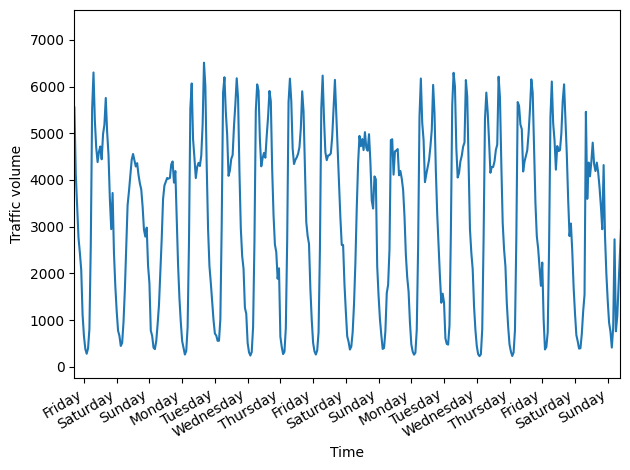

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ En la figura 12.4 se puede apreciar una estacionalidad diaria clara, ya que el volumen de tráfico es menor al principio y al final de cada día.
+ También se puede observar un volumen de tráfico menor durante los fines de semana.
+ En cuanto a la tendencia, es probable que dos semanas de datos no sean suficientes para sacar una conclusión razonable, pero parece que el volumen no aumenta ni disminuye con el tiempo en la figura.
+ También podemos representar gráficamente la temperatura por hora, ya que será un objetivo para nuestros modelos de múltiples salidas.
+ Aquí, esperamos ver estacionalidad anual y diaria.
+ La estacionalidad anual debería deberse a las estaciones del año, mientras que la estacionalidad diaria se deberá al hecho de que las temperaturas tienden a ser más bajas por la noche y más altas durante el día.

# **Paso 4. Si existe algun patron estacional construya un grafico donde se aprecie el patron**
+ Primero, visualicemos la temperatura horaria en todo el conjunto de datos para ver si podemos identificar alguna estacionalidad anual. El resultado se muestra en la figura 12.5.

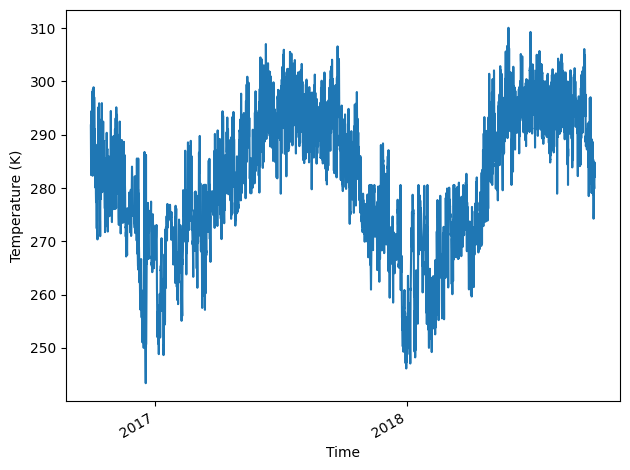

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')

plt.xticks([2239, 10999], [2017, 2018])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **Temperatura horaria (en Kelvin) del 29 de septiembre de 2016 al 30 de septiembre de 2018. Aunque hay ruido, podemos ver un patrón estacional anual.**


### **Acerca de la descomposición de la serie**
+ En la figura 12.5 se puede observar un patrón estacional anual en la temperatura horaria, ya que las temperaturas son más bajas a finales y principios de año (invierno en Minnesota) y más altas a mediados de año (verano).
+ Por lo tanto, como se esperaba, la temperatura tiene estacionalidad anual.
+ Ahora, verifiquemos si podemos observar estacionalidad diaria en la temperatura. El resultado se muestra en la figura 12.6.

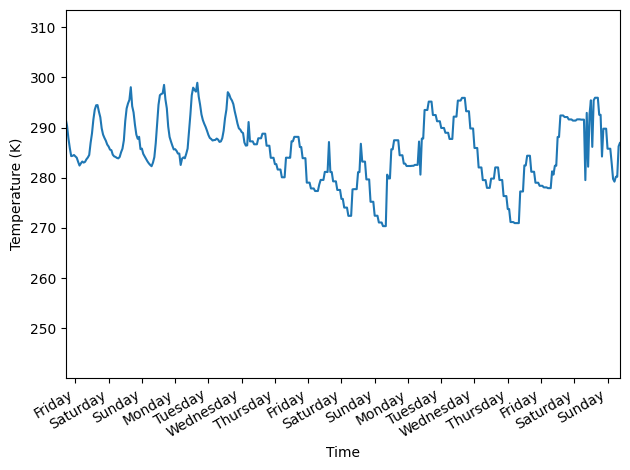

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **Figura 12.6 Temperatura horaria (en Kelvin) a partir del 29 de septiembre de 2016 a las 5 p.m. CST. Aunque es un poco ruidosa, podemos ver que las temperaturas son efectivamente más bajas al principio y al final de cada día y alcanzan su punto máximo durante el mediodía, lo que sugiere una estacionalidad diaria.**
+ En la figura 12.6 se puede observar que la temperatura es más baja al principio y al final de cada día y alcanza su punto máximo hacia la mitad de cada día. Esto sugiere una estacionalidad diaria, tal como observamos para el volumen de tráfico en la figura 12.4.

# **Paso 5. Ingeniería de características y división de datos**
## **Ingeniería de características y división de datos**
+ Una vez que hayamos terminado de explorar los datos, pasaremos a la ingeniería de características y la división de datos.
+ En esta sección, estudiaremos cada característica y crearemos otras nuevas que ayudarán a nuestros modelos a pronosticar el volumen de tráfico y la temperatura por hora.
+ Por último, dividiremos los datos y guardaremos cada conjunto como un archivo CSV para su uso posterior.
+ Una excelente manera de estudiar las características de un conjunto de datos es utilizar el método describe de pandas.
+ Este método devuelve la cantidad de registros para cada característica, lo que nos permite identificar rápidamente los valores faltantes, la media, la desviación estándar, los cuartiles y los valores máximos y mínimos de cada característica.

## **a. El método de transposición coloca cada entidad en su propia fila**

+ A partir de la salida, notará que rain_1h es mayoritariamente 0 en todo el conjunto de datos, ya que su tercer cuartil aún está en 0.
+ Dado que al menos el 75 % de los valores de rain_1h son 0, es poco probable que sea un predictor sólido del volumen de tráfico. Por lo tanto, esta característica se eliminará.
+ Si observa snow_1h, notará que esta variable está en 0 en todo el conjunto de datos. Esto es fácilmente observable, ya que sus valores mínimo y máximo son ambos 0.
+ Por lo tanto, esto no predice la variación en el volumen de tráfico a lo largo del tiempo. Esta característica también se eliminará del conjunto de datos.

In [ ]:
df.describe().transpose() # El método de transposición coloca cada entidad en su propia fila.

,count,mean,std,min,25%,50%,75%,max
temp,17551.0,281.416203,12.688262,243.39,272.22,282.41,291.89,310.07
rain_1h,17551.0,0.025523,0.259794,0.00,0.00,0.00,0.00,10.60
snow_1h,17551.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
clouds_all,17551.0,42.034129,39.065960,0.00,1.00,40.00,90.00,100.00
traffic_volume,17551.0,3321.484588,1969.223949,113.00,1298.00,3518.00,4943.00,7280.00


### **b. Eliminando las variables inocuas**

In [ ]:
### **b. Eliminando las variables inocuas**
cols_to_drop = ['rain_1h', 'snow_1h']
df = df.drop(cols_to_drop, axis=1)
df.shape

(17551, 4)

## **c. codificando la característica date_time**
+ Ahora llegamos al interesante problema de codificar el tiempo como una característica utilizable para nuestros modelos de aprendizaje profundo.
+ En este momento, la característica date_time no es utilizable por nuestros modelos, ya que es una cadena de fecha y hora.
+ Por lo tanto, la convertiremos en un valor numérico.
+ Una forma sencilla de hacerlo es expresar la fecha como una cantidad de segundos. Esto se logra mediante el uso del método timestamp de la biblioteca datetime.

In [ ]:
# **c. codificando la característica date_time**
timestamp_s = pd.to_datetime(df['date_time']).map(datetime.datetime.timestamp)

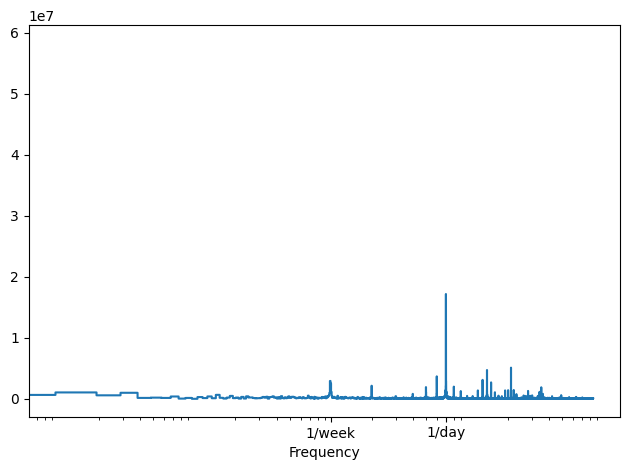

In [ ]:
fft = tf.signal.rfft(df['traffic_volume'])
f_per_dataset = np.arange(0, len(fft))

n_sample_h = len(df['traffic_volume'])
hours_per_week = 24 * 7
weeks_per_dataset = n_sample_h / hours_per_week

f_per_week = f_per_dataset / weeks_per_dataset

plt.step(f_per_week, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 7], ['1/week', '1/day'])
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

#### **d. Acerca del paso anterior**
+ Lamentablemente, no hemos terminado, ya que esto simplemente expresa cada fecha en segundos, como se muestra en la figura 12.7.
+ Esto nos lleva a perder la naturaleza cíclica del tiempo, porque la cantidad de segundos simplemente aumenta linealmente con el tiempo.
+ Por lo tanto, debemos aplicar una transformación para recuperar el comportamiento cíclico del tiempo.

#### **e. Recuperando la propiedad ciclica**
+ Una forma sencilla de hacerlo es aplicar una transformación seno.
+ Sabemos que la función seno es cíclica, acotada entre -1 y 1. Esto nos ayudará a recuperar parte de la propiedad cíclica del tiempo.
+ **La marca de tiempo está en segundos, por lo que debemos calcular la cantidad de segundos de un día antes de aplicar la transformación del seno.**
+ **Aplicación de la transformación seno. Observe que utilizamos radianes en la función seno.**

In [ ]:
# **e. Recuperando la propiedad ciclica**
day = 24 * 60 * 60

df['day_sin'] = (np.sin(timestamp_s * (2*np.pi/day))).values
df['day_cos'] = (np.cos(timestamp_s * (2*np.pi/day))).values

In [ ]:
df = df.drop(['date_time'], axis=1) # Eliminar la columna date_time

df.head()

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,291.75,0,5551.0,-0.965926,-2.588190e-01
1,290.36,0,4132.0,-1.000000,-4.048636e-12
2,287.86,0,3435.0,-0.965926,2.588190e-01
3,285.91,0,2765.0,-0.866025,5.000000e-01
4,284.31,0,2443.0,-0.707107,7.071068e-01


### **f. Transformacion seno - coseno**
+ Con una única transformación de seno, recuperamos parte de la propiedad cíclica que se perdió al convertir a segundos.
+ Sin embargo, en este punto, las 12 p. m. equivalen a las 12 a. m. y las 5 p. m. equivalen a las 5 a. m.
+ Esto no es deseable, ya que queremos distinguir entre la mañana y la tarde.
+ Por lo tanto, aplicaremos una transformación de coseno. Sabemos que el coseno está desfasado con la función seno.
+ Esto nos permite distinguir entre las 5 a. m. y las 5 p. m., expresando la naturaleza cíclica del tiempo en un día. En este punto, podemos eliminar la columna date_time del DataFrame.

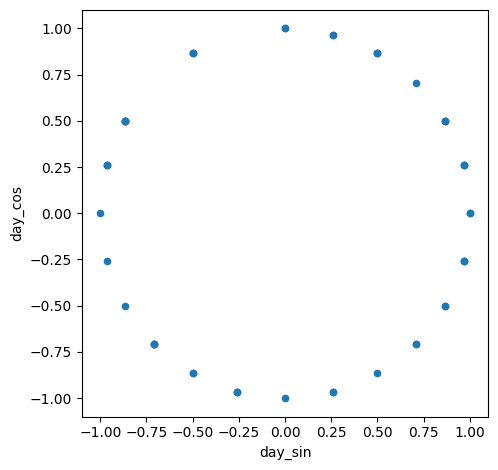

In [ ]:
# **f. Transformacion seno - coseno**
df.sample(50).plot.scatter('day_sin','day_cos').set_aspect('equal');
plt.tight_layout()

plt.savefig('figures', dpi=300)

## **Acerca de la Transformacion seno - coseno**
+ En la figura 12.8, notará que los puntos forman un círculo, como un reloj.
+ Por lo tanto, hemos expresado con éxito cada marca de tiempo como un punto en el reloj, lo que significa que ahora tenemos valores numéricos que conservan la naturaleza cíclica del tiempo en un día, y esto se puede usar en nuestros modelos de aprendizaje profundo.
+ Esto será útil ya que observamos la estacionalidad diaria tanto de la temperatura como del volumen de tráfico.

### **Paso 7. Conjunto de entrenamiento, validación y prueba**

+ *Una vez completada la ingeniería de características, ahora podemos dividir nuestros conjuntos de datos de entrenamiento, validación y prueba*.
+ El conjunto de entrenamiento es la muestra de datos que se usa para ajustar el modelo.
+ El conjunto de validación es un poco como un conjunto de prueba que el modelo puede revisar para ajustar sus hiperparámetros y mejorar su rendimiento durante el entrenamiento del modelo.
+ El conjunto de prueba está completamente separado del procedimiento de entrenamiento del modelo y se usa para una evaluación imparcial del rendimiento del modelo.
+ **Aquí usaremos una división simple de 70:20:10 para los conjuntos de entrenamiento, validación y prueba. Si bien el 10% de los datos parece una porción pequeña para el conjunto de prueba, recuerde que tenemos más de 17000 registros, lo que significa que evaluaremos el modelo en más de 1000 puntos de datos, lo cual es más que suficiente.**

In [ ]:
n = len(df)

# Split 70:20:10 (train:validation:test)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

train_df.shape, val_df.shape, test_df.shape

print(f'Longitud del conjunto de Datos es = {len(df)}')
print(f'Longitud del conjunto de Entrenamiento es = {len(train_df)}')
print(f'Longitud del conjunto de Validación es = {len(val_df)}')
print(f'Longitud del conjunto de prueba es = {len(test_df)}')



Longitud del conjunto de Datos es = 17551
Longitud del conjunto de Entrenamiento es = 12285
Longitud del conjunto de Validación es = 3510
Longitud del conjunto de prueba es = 1756


In [ ]:
df.head() # recordemos cuales son nuestras variables

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,291.75,0,5551.0,-0.965926,-2.588190e-01
1,290.36,0,4132.0,-1.000000,-4.048636e-12
2,287.86,0,3435.0,-0.965926,2.588190e-01
3,285.91,0,2765.0,-0.866025,5.000000e-01
4,284.31,0,2443.0,-0.707107,7.071068e-01


In [ ]:
df.tail() # recordemos cuales son nuestras variables

,temp,clouds_all,traffic_volume,day_sin,day_cos
17546,283.45,75,3543.0,-0.965926,0.258819
17547,282.76,90,2781.0,-0.866025,0.500000
17548,282.73,90,2159.0,-0.707107,0.707107
17549,282.09,90,1450.0,-0.500000,0.866025
17550,282.12,90,954.0,-0.258819,0.965926


### **Paso 8. debemos escalarlos para que todos los valores estén entre 0 y 1**
+ Antes de guardar los datos, debemos escalarlos para que todos los valores estén entre 0 y 1.
+ Esto reduce el tiempo necesario para entrenar los modelos de aprendizaje profundo y mejora su rendimiento.
+ Usaremos `MinMaxScaler` de `sklearn` para escalar nuestros datos.
+ Tenga en cuenta que ajustaremos el escalador al conjunto de entrenamiento para evitar fugas de datos.
+ De esa manera, simulamos el hecho de que solo tenemos los datos de entrenamiento disponibles cuando usamos el modelo y el modelo no conoce información futura. La evaluación del modelo permanece imparcial.

In [ ]:
## **8. Escalando los datos**
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

### **Paso 9. Parámetros escalados del modelo**
+ Vale la pena mencionar por qué los datos se escalan y no se normalizan.
+ Escalado y normalización pueden ser términos confusos para los científicos de datos, ya que a menudo se usan indistintamente.
+ En resumen, **escalar los datos afecta solo su escala y no su distribución**.
+ Por lo tanto, simplemente fuerza los valores dentro de un rango determinado.
+ En nuestro caso, forzamos los valores a estar entre 0 y 1.
+ **Normalizar los datos, por otro lado, afecta su distribución y su escala**.
+ Por lo tanto, normalizar los datos los obligaría a tener una distribución normal o una distribución gaussiana.
+ El rango original también cambiaría y trazar la frecuencia de cada valor generaría una curva de campana clásica.
+ Normalizar los datos solo es útil cuando los modelos que usamos requieren que los datos sean normales.
+ Por ejemplo, el análisis discriminante lineal (LDA) se deriva del supuesto de una distribución normal, por lo que es mejor normalizar los datos antes de usar LDA.
+ Sin embargo, en el caso del aprendizaje profundo, no se hacen suposiciones, por lo que la normalización no es necesaria.


In [ ]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,12285.0,0.555681,0.196527,0.0,0.424800,0.557913,0.715072,1.0
clouds_all,12285.0,0.431034,0.393716,0.0,0.010000,0.400000,0.900000,1.0
traffic_volume,12285.0,0.445735,0.273635,0.0,0.165899,0.473141,0.671271,1.0
day_sin,12285.0,0.500084,0.353568,0.0,0.146447,0.500000,0.853553,1.0
day_cos,12285.0,0.500084,0.353568,0.0,0.146447,0.500000,0.853553,1.0


### **Paso 10. Guardar los Datos como Archivo SCV**
+ Finalmente, guardaremos cada conjunto como un archivo CSV para usarlo en los siguientes capítulos.

In [ ]:
train_df.to_csv('train.csv')
val_df.to_csv('val.csv')
test_df.to_csv('test.csv')

### **Paso 11. Explorando cómo se entrenan los modelos de aprendizaje profundo para la previsión de series temporales**

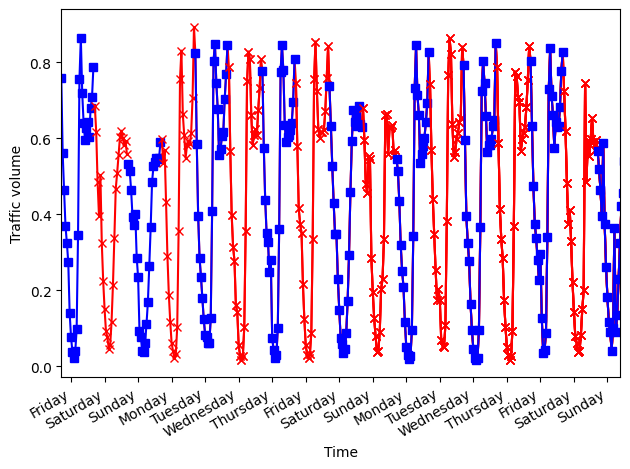

In [ ]:
fig, ax = plt.subplots()

for n in range(0,17,2):
    start = 24*n
    stop = 24*(n+1)
    ax.plot(train_df.traffic_volume[start:stop], marker='s', color='blue', label='input')
    ax.plot(train_df.traffic_volume[stop:2*stop], marker='x', color='red', label='label')
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

### **Paso 12. Implementando la clase DataWindow**

+ A continuación, definiremos una función para representar gráficamente los datos de entrada, las predicciones y los valores reales (listado 13.2).
+ Dado que trabajaremos con muchas ventanas de tiempo, mostraremos solo el gráfico de tres ventanas de tiempo, pero este parámetro se puede cambiar fácilmente.
+ Además, la etiqueta predeterminada será el volumen de tráfico, pero podemos cambiarla especificando cualquier columna que elijamos.
+ Nuevamente, esta función debe incluirse en la clase DataWindow.

In [ ]:
class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
        inputs, labels = self.sample_batch

        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)
# Grafique las entradas. Aparecerán como una línea azul continua con puntos.

            if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
              label_col_index = plot_col_index

            if label_col_index is None:
              continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64)
            # Grafique las etiquetas o los valores reales. Aparecerán como cuadrados verdes.
            if model is not None:
              predictions = model(inputs)
              plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='red', s=64)
# Grafica las predicciones. Aparecerán como cruces rojas.
            if n == 0:
              plt.legend()

        plt.xlabel('Time (h)')
# Pase los datos. Esto corresponde a nuestro conjunto de entrenamiento, conjunto de validación o conjunto de prueba.
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )
  # Los objetivos se establecen en Ninguno, ya que son manejados por la función split_to_input_labels.
        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

### **Clase DataWindow creada**

+ Por ahora, la clase DataWindow puede parecer un poco abstracta, pero pronto la usaremos para aplicar modelos de referencia.
+ Usaremos esta clase en todos los capítulos de esta parte del libro dedicada al aprendizaje profundo, por lo que poco a poco dominarás este código y apreciarás lo fácil que es probar diferentes arquitecturas de aprendizaje profundo.

### **Paso 13. Modelo de línea base de un solo paso**
+ Para fines de representación gráfica, también definiremos una ventana más amplia para poder visualizar muchas predicciones de nuestro modelo.
+ De lo contrario, solo podríamos visualizar un punto de datos de entrada y una predicción de salida, lo que no es muy interesante.

In [ ]:
# **Paso 13. Modelo de línea base de un solo paso**
single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['traffic_volume'])
wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['traffic_volume'])

+ En esta situación, la predicción más simple que podemos hacer es el último valor observado.
+ Básicamente, la predicción es simplemente el punto de datos de entrada.
+ Esto se implementa mediante la clase Baseline.
+ Como puede ver en la siguiente lista, la clase Baseline también se puede utilizar para un modelo de múltiples salidas.
+ Por ahora, nos centraremos únicamente en un modelo de un solo paso.

In [ ]:
class Baseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs

        elif isinstance(self.label_index, list):
            tensors = []
            for index in self.label_index:
                result = inputs[:, :, index]
                result = result[:, :, tf.newaxis]
                tensors.append(result)
            return tf.concat(tensors, axis=-1)

        result = inputs[:, :, self.label_index]
        return result[:,:,tf.newaxis]

### **Paso 14. Una vez definida la clase, podemos inicializar el modelo y compilarlo para generar predicciones**.
+ Para ello, buscaremos el índice de nuestra columna de destino, Traffic_volume, y lo pasaremos a Baseline.
+ Tenga en cuenta que **TensorFlow** requiere que proporcionemos una función de pérdida y una métrica de evaluación.
+ En este caso, y a lo largo de los capítulos de aprendizaje profundo, **utilizaremos el error cuadrático medio (MSE) como función de pérdida**: penaliza los errores grandes y, por lo general, produce modelos bien ajustados.
+ **Para la métrica de evaluación, utilizaremos el error absoluto medio (MAE) por su facilidad de interpretación.**

In [ ]:
## **a. Definimos la función de perdida y la métrica**
# Genere un diccionario con el nombre y el índice de cada columna en el conjunto de entrenamiento.
column_indices = {name: i for i, name in enumerate(train_df.columns)}

# Pase el índice de la columna de destino en la clase Baseline.
baseline_last = Baseline(label_index=column_indices['traffic_volume'])

# Compilar el modelo para generar las predicciones.
baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

### **Paso 15. Ahora evaluaremos el rendimiento de nuestra línea base tanto en el conjunto de validación como en el de prueba.**
+ Los modelos creados con TensorFlow cuentan con el método de evaluación, que nos permite comparar las predicciones con los valores reales y calcular la métrica de error.

In [ ]:
# Cree un diccionario para almacenar el MAE de un modelo en el conjunto de validación.
val_performance = {}

# Cree un diccionario para almacenar el MAE de un modelo en el conjunto de prueba.
performance = {}

#Almacene el MAE de baseline en el conjunto de validación.
val_performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.val)
# Almacene el MAE de la línea base en el conjunto de prueba.
performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.test, verbose=0)

110/110 [==============================] - 1s 3ms/step - loss: 0.0133 - mean_absolute_error: 0.0831


### **Paso 16. Podemos visualizar las predicciones utilizando el método plot de la clase DataWindow.**
+ Genial, hemos creado con éxito una línea base que predice el último valor conocido y lo hemos evaluado. Podemos visualizar las predicciones utilizando el método plot de la clase DataWindow.
+ Recuerda utilizar wide_window para ver más de dos puntos de datos.

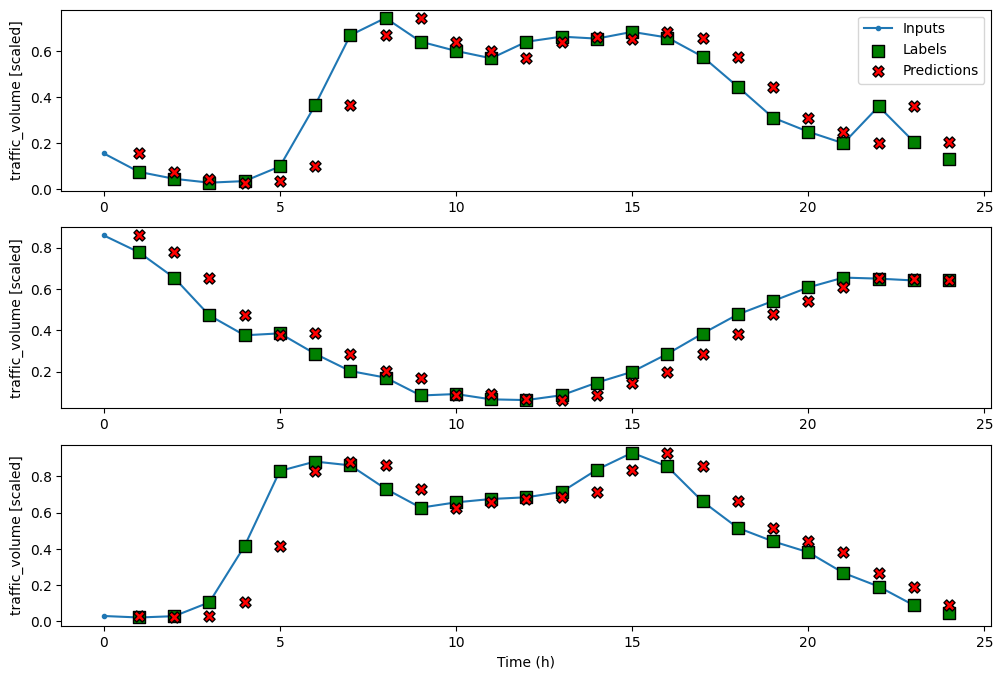

In [ ]:
wide_window.plot(baseline_last)

plt.savefig('figures', dpi=300)

### **Acerca del paso 16**
+ **Figura 13.9 Predicciones de nuestro modelo de referencia de un solo paso en tres secuencias del lote de muestra. La predicción en cada paso de tiempo es el último valor conocido, lo que significa que nuestra referencia funciona como se esperaba.**
+ En la figura 13.9, las etiquetas son cuadrados y las predicciones son cruces.
+ Las cruces en cada paso de tiempo son simplemente el último valor conocido, lo que significa que tenemos una línea base que funciona como se esperaba.
+ Su gráfico puede diferir del de la figura 13.9, ya que el lote de muestra almacenado en caché cambia cada vez que se inicializa una ventana de datos.

### **Paso 17. Opcionalmente podemos imprimir el MAE de nuestra línea base en el conjunto de prueba.**
+ Esto devuelve un MAE de 0,081.
+ Los modelos más complejos deberían tener un mejor rendimiento que el modelo de referencia, lo que daría como resultado un MAE menor.

In [ ]:
# Almacene el MAE de la línea base en el conjunto de prueba.
print(f'Para nuestro modelo de Referencia MAE el error absoluto es')
print(performance['Baseline - Last'][1])

Para nuestro modelo de Referencia MAE el error absoluto es
0.08128400146961212


### **Paso 18. Pronosticando con el Modelo de referencia de varios pasos**
+ Con la ventana de datos generada, ahora podemos centrarnos en implementar los modelos de línea base.
+ En esta situación, hay dos líneas base razonables:
  + Predecir el último valor conocido para los próximos 24 pasos de tiempo.
  + Predecir los últimos 24 pasos de tiempo para los próximos 24 pasos de tiempo.
+ Con eso en mente, implementemos la primera línea base, donde simplemente repetiremos el último valor conocido en los próximos 24 pasos de tiempo.


In [ ]:
# **Paso 18. Pronosticando con el Modelo de referencia de varios pasos**
multi_window = DataWindow(input_width=24, label_width=24, shift=24, label_columns=['traffic_volume'])

### **a. PREDICCIÓN DEL ÚLTIMO VALOR CONOCIDO**
+ Para predecir el último valor conocido, definiremos una clase MultiStepLastBaseline que simplemente toma la entrada y repite el último valor de la secuencia de entrada en 24 pasos de tiempo.

In [ ]:
class MultiStepLastBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None: #Devuelve el último valor conocido de la columna de destino durante los próximos 24 pasos de tiempo.
            return tf.tile(inputs[:, -1:, :], [1, 24, 1]) # Si no se especifica ningún objetivo, devuelve el último valor conocido
            #de todas las columnas durante los próximos 24 pasos de tiempo
        return tf.tile(inputs[:, -1:, self.label_index:], [1, 24, 1])


### **b. A continuación, inicializaremos la clase y especificaremos la columna de destino.**
+ Luego, repetiremos los mismos pasos que en la sección anterior, compilando el modelo y evaluándolo en el conjunto de validación y el conjunto de prueba.

In [ ]:
ms_baseline_last = MultiStepLastBaseline(label_index=column_indices['traffic_volume'])

ms_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

ms_val_performance = {}
ms_performance = {}

ms_val_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.val)
ms_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.test, verbose=0)

109/109 [==============================] - 0s 3ms/step - loss: 0.1874 - mean_absolute_error: 0.3520


### **c. Ahora podemos visualizar las predicciones utilizando el método de gráfico de DataWindow**
+ El resultado se muestra en la figura 13.10.

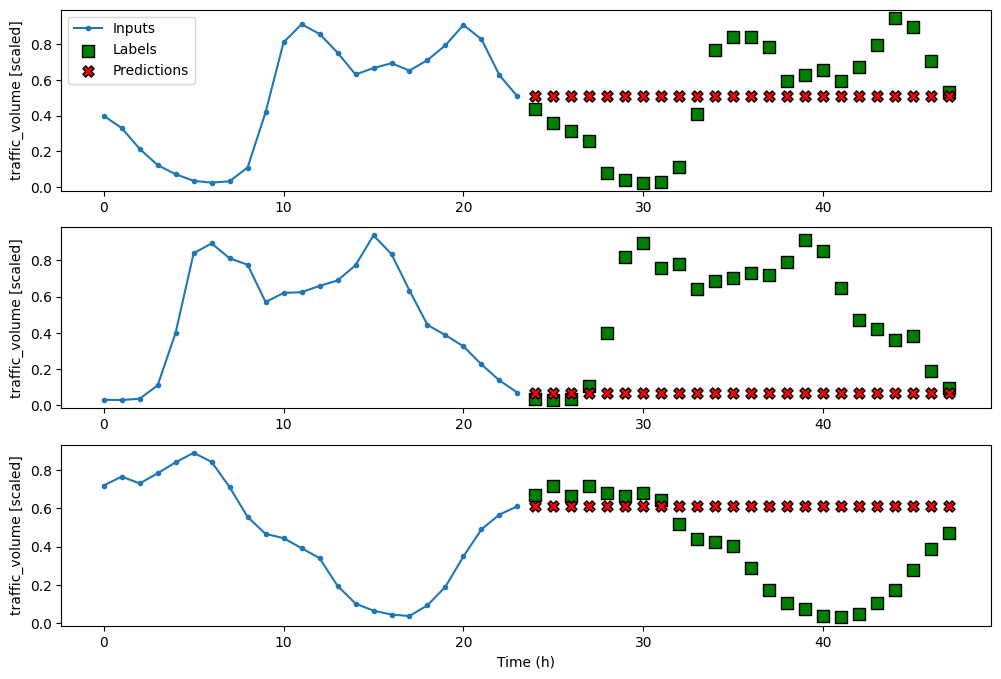

In [ ]:
multi_window.plot(ms_baseline_last)

+ **Figura 13.10 Predicción del último valor conocido para los próximos 24 pasos de tiempo. Podemos ver que las predicciones, que se muestran como cruces, corresponden al último valor de la secuencia de entrada, por lo que nuestra línea base se comporta como se esperaba.**
+ Nuevamente, podemos imprimir opcionalmente el MAE de la línea base. De la figura 13.10, podemos esperar que

In [ ]:
# Almacene el MAE de la línea base en el conjunto de prueba.
print(f'Para nuestro modelo de Referencia MAE multipaso el error absoluto es')
print(ms_performance['Baseline - Last'][1])

Para nuestro modelo de Referencia MAE multipaso el error absoluto es
0.34706416726112366


+ **Esto da un MAE de 0,347. Ahora veamos si podemos construir una mejor línea base simplemente repitiendo la secuencia de entrada.**

### **Paso 19. REPETICIÓN DE LA SECUENCIA DE ENTRADA**
+ Implementemos una segunda línea base para los modelos de varios pasos, que simplemente devuelve la secuencia de entrada.
+ Esto significa que la predicción para las próximas 24 horas será simplemente la última de las 24 horas de datos conocidas.
### **a. Esto se implementa a través de la clase RepeatBaseline**

In [ ]:
class RepeatBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        return inputs[:, :, self.label_index:]

### **b. Ahora podemos inicializar el modelo de referencia y generar predicciones.**
+ Tenga en cuenta que la función de pérdida y la métrica de evaluación siguen siendo las mismas.

In [ ]:
ms_baseline_repeat = RepeatBaseline(label_index=column_indices['traffic_volume'])

ms_baseline_repeat.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

ms_val_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.val)
ms_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.test, verbose=0)

109/109 [==============================] - 1s 6ms/step - loss: 0.2125 - mean_absolute_error: 0.3533


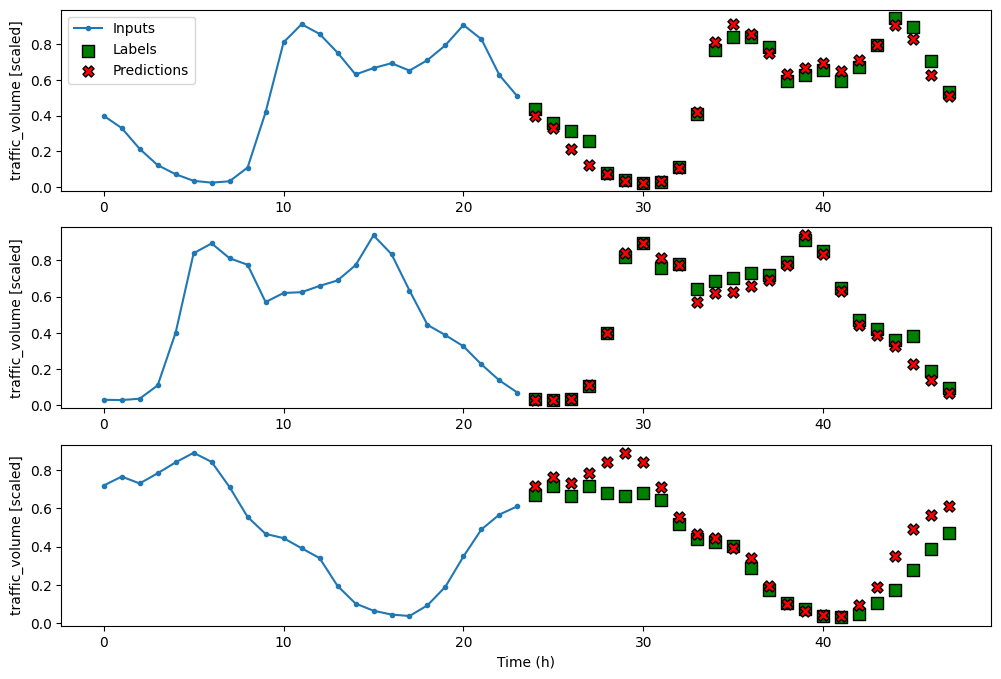

In [ ]:
multi_window.plot(ms_baseline_repeat)

plt.savefig('figures', dpi=300)

+ **A continuación, podemos visualizar las predicciones. El resultado se muestra en la figura 13.11. Esta línea base funciona bien, lo cual es de esperar, ya que identificamos la estacionalidad diaria en el capítulo anterior. Esta línea base es el equivalente a predecir la última estación conocida.**

In [ ]:
# Almacene el MAE de la línea base en el conjunto de prueba.
print(f'Para nuestro modelo de Referencia MAE multipaso el error absoluto es')
print(ms_performance['Baseline - Last'][1])

Para nuestro modelo de Referencia MAE multipaso el error absoluto es
0.34706416726112366


### **Paso 20. Modelo de referencia de múltiples salidas**
+ Luego, utilizaremos la clase Baseline que definimos para el modelo de un solo paso.
+ Recuerde que esta clase puede generar el último valor conocido para una lista de objetivos.

In [ ]:
# Tenga en cuenta que pasamos tanto temp como Traffic_volume, ya que esos son nuestros dos objetivos para el modelo de salida múltiple.
mo_single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['temp','traffic_volume'])
mo_wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['temp','traffic_volume'])

In [ ]:
print(column_indices['traffic_volume'])
print(column_indices['temp'])

2
0


In [ ]:
mo_baseline_last = Baseline(label_index=[0, 2])

mo_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

mo_val_performance = {}
mo_performance = {}

mo_val_performance['Baseline - Last'] = mo_baseline_last.evaluate(mo_wide_window.val)
mo_performance['Baseline - Last'] = mo_baseline_last.evaluate(mo_wide_window.test, verbose=0)

109/109 [==============================] - 1s 3ms/step - loss: 0.0069 - mean_absolute_error: 0.0482


### **Paso 21. Predicciones para nuestras variables objetivo**
+ Por último, podemos visualizar las predicciones en relación con los valores reales.
+ De forma predeterminada, nuestro método de gráfico mostrará el volumen de tráfico en el eje y, lo que nos permitirá visualizar rápidamente uno de nuestros objetivos, como se muestra en la figura 13.12.**

### **a. Predicción para la variable traffic_volume**

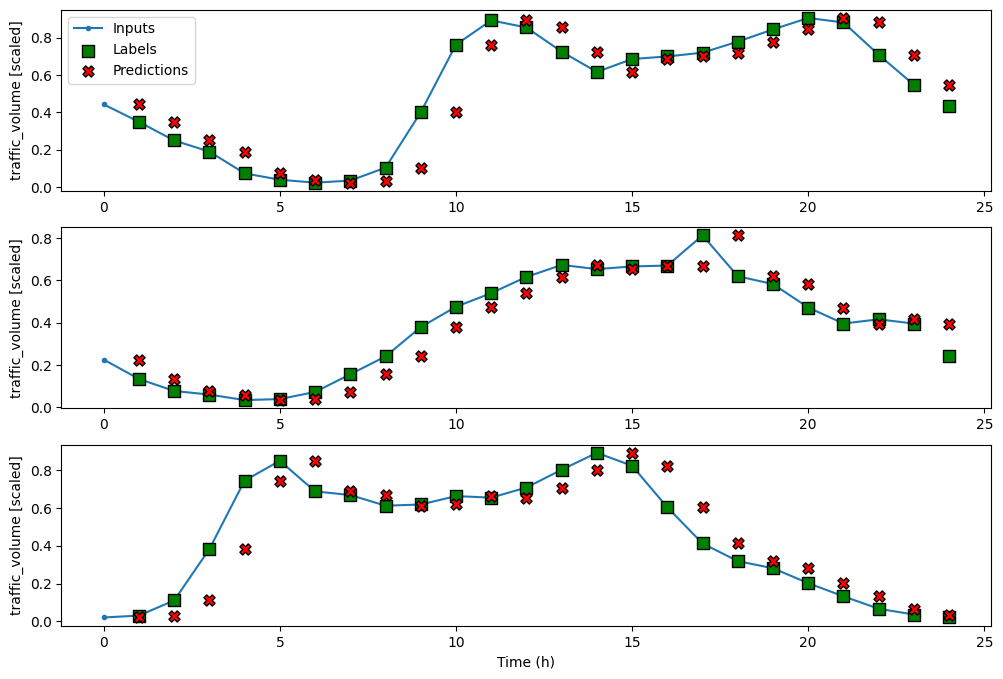

In [ ]:
### **a. Predicción para la variable traffic_volume**
mo_wide_window.plot(mo_baseline_last)

plt.savefig('figures', dpi=300)

### **b. Predicción para la variable Temp**
+ La figura 13.12 no muestra nada sorprendente, ya que ya vimos estos resultados cuando construimos un modelo de referencia de un solo paso.
+ La particularidad del modelo de múltiples salidas es que también tenemos predicciones para la temperatura.
+ Por supuesto, también podemos visualizar las predicciones para la temperatura especificando el objetivo en el método de gráfico.
+ El resultado se muestra en la figura 13.13.

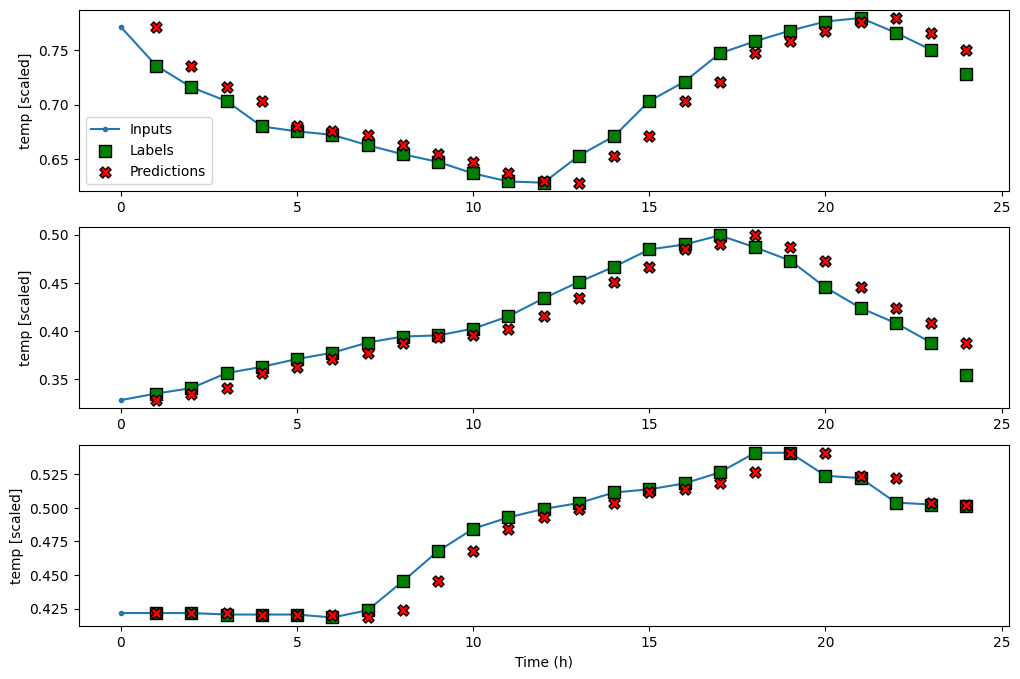

In [ ]:
mo_wide_window.plot(model=mo_baseline_last, plot_col='temp')

+ **Figura 13.13 Predicción del último valor conocido de la temperatura. Las predicciones (cruces) son iguales al punto de datos anterior, por lo que nuestro modelo de referencia se comporta como se esperaba.**

In [ ]:
### **c. Error MAE**

In [ ]:
# Almacene el MAE de la línea base en el conjunto de prueba.
print(f'Para nuestro modelo de Referencia MAE multipaso el error absoluto es')
print(mo_performance['Baseline - Last'][1])

Para nuestro modelo de Referencia MAE multipaso el error absoluto es
0.04710666835308075



### **Paso 22. Implementación de un modelo lineal de un solo paso**
+ La función toma un modelo y una ventana de datos de la clase DataWindow.
+ La paciencia es la cantidad de épocas después de las cuales el modelo debe dejar de entrenarse si la pérdida de validación no mejora; max_epochs establece una cantidad máxima de épocas para entrenar el modelo.
+ Se realiza un seguimiento de la pérdida de validación para determinar si debemos aplicar una detención anticipada o no.
+ El MSE se utiliza como función de pérdida.
+ La detención anticipada se produce si 3 épocas consecutivas no reducen la pérdida de validación, según lo establecido por el parámetro de paciencia.
+ El modelo se ajusta al conjunto de entrenamiento.
+ El MAE se utiliza como métrica de error. Así es como comparamos el
rendimiento de nuestros modelos. Un MAE más bajo significa un mejor modelo.
+ Utilizamos el conjunto
de validación para calcular la
pérdida de validación.
+ early_stopping se pasa como una
devolución de llamada. Si la pérdida de
validación no disminuye después de
3 épocas consecutivas, el
modelo detiene el entrenamiento. Esto
evita el sobreajuste.
+ El modelo puede entrenarse durante
un máximo de 50 épocas, según lo
establecido por el parámetro max_epochs.

In [ ]:
def compile_and_fit(model, window, patience=3, max_epochs=50):
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=patience,
                                   mode='min')

    model.compile(loss=MeanSquaredError(),
                  optimizer=Adam(),
                  metrics=[MeanAbsoluteError()])

    history = model.fit(window.train,
                       epochs=max_epochs,
                       validation_data=window.val,
                       callbacks=[early_stopping])

    return history

### **Acerca del codigo usado**
+ Este fragmento de código se reutilizará en todos los capítulos de aprendizaje profundo, por lo que es importante comprender lo que está sucediendo.
+ La función compile_and_fit toma un modelo de aprendizaje profundo, una ventana de datos de la clase DataWindow, el parámetro de paciencia y el parámetro max_epochs.
+ El parámetro de paciencia se utiliza en la función early_stopping, que nos permite detener el entrenamiento del modelo si no hay mejoras en la pérdida de validación, como se especifica en el parámetro de monitor.
+ De esa manera, evitamos el tiempo de entrenamiento inútil y el sobreajuste.
+ Luego, se compila el modelo. En Keras, esto simplemente configura el modelo para especificar la función de pérdida que se utilizará, el optimizador y las métricas de evaluación.
+ En nuestro caso, utilizaremos el MSE como función de pérdida porque el error se eleva al cuadrado, lo que significa que el modelo se penaliza considerablemente por grandes diferencias entre los valores previstos y los reales.
+ Utilizaremos el optimizador *Adam* porque es un optimizador rápido y eficiente.
+ Por último, utilizaremos el MAE como métrica de evaluación para comparar el rendimiento de nuestros modelos, ya que lo utilizamos para evaluar nuestros modelos de referencia en el capítulo anterior y es fácil de interpretar.
+ Luego, el modelo se ajusta a los datos de entrenamiento de hasta 50 épocas, según lo establecido por el parámetro max_epochs.
+ La validación se realiza en el conjunto de validación y pasamos early_stopping como devolución de llamada.
+ De esa manera, Keras aplicará la detención temprana si ve que la pérdida de validación no ha disminuido después de 3 épocas consecutivas.
+ Con compile_and_fit en su lugar, podemos avanzar para construir realmente nuestro modelo lineal.
+ Utilizaremos el modelo secuencial de Keras, ya que nos permite apilar diferentes capas.
+ Dado que estamos construyendo un modelo lineal aquí, solo tenemos una capa: una capa densa, que es la capa más básica en el aprendizaje profundo.
+ Especificaremos la cantidad de unidades como 1, ya que el modelo debe generar solo un valor: la predicción del volumen de tráfico en el próximo paso de tiempo.

### **Paso 23. Construyendo un modelo lineal - la capa más básica en el aprendizaje profundo**
+ Claramente, Keras facilita mucho la creación de modelos.
+ Una vez completado este paso, podemos entrenar el modelo mediante compile_and_fit y almacenar el rendimiento para compararlo posteriormente con la línea base.

In [ ]:
linear = Sequential([
    Dense(units=1)
])

history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
384/384 [==============================] - 2s 4ms/step - loss: 0.5990 - mean_absolute_error: 0.6522 - val_loss: 0.2186 - val_mean_absolute_error: 0.3970
Epoch 2/50
384/384 [==============================] - 2s 5ms/step - loss: 0.1285 - mean_absolute_error: 0.3023 - val_loss: 0.0972 - val_mean_absolute_error: 0.2640
Epoch 3/50
384/384 [==============================] - 3s 7ms/step - loss: 0.0680 - mean_absolute_error: 0.2178 - val_loss: 0.0517 - val_mean_absolute_error: 0.1909
Epoch 4/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0361 - mean_absolute_error: 0.1573 - val_loss: 0.0279 - val_mean_absolute_error: 0.1378
Epoch 5/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0208 - mean_absolute_error: 0.1171 - val_loss: 0.0174 - val_mean_absolute_error: 0.1043
Epoch 6/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0952 - val_loss: 0.0134 - val_mean_absolute_error: 0.0862
Epoch 7/50
384/3

### **Paso 24. visualizar las predicciones - método plot de wide_window**
+ Opcionalmente, podemos visualizar las predicciones de nuestro modelo lineal utilizando el método plot de wide_window. El resultado se muestra en la figura 14.2.
+ el rendimiento de nuestros modelos en relación con las líneas base. Por ahora, pasemos a implementar los modelos lineales de múltiples pasos y de múltiples salidas.

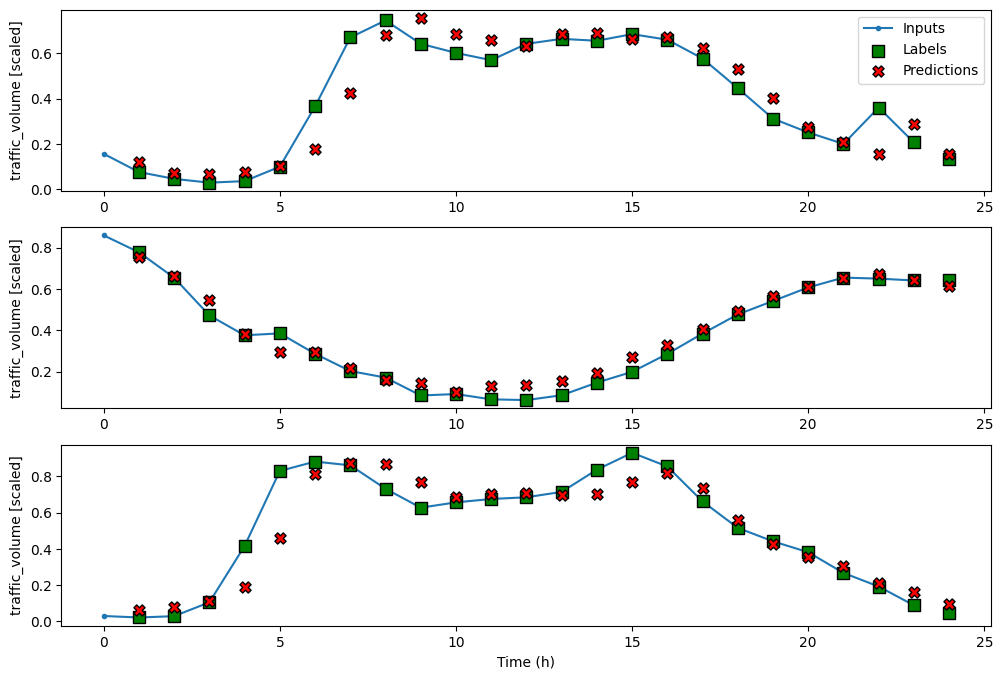

In [ ]:
wide_window.plot(linear)

plt.savefig('figures', dpi=300)

+ **Figura 14.2 Predicciones del volumen de tráfico utilizando el modelo lineal como modelo de un solo paso. Las predicciones (mostradas como cruces) son bastante precisas, y algunas predicciones se superponen a los valores reales (mostrados como cuadrados)**

# **14.1.2. Implementación de un modelo lineal de varios pasos**
+ Nuestro modelo lineal de un solo paso está construido y ahora podemos extenderlo a un modelo lineal de varios pasos.
+ Recordemos que en la situación de varios pasos, deseamos predecir las próximas 24 horas de datos utilizando una ventana de entrada de 24 horas de datos.
+ Nuestro objetivo sigue siendo el volumen de tráfico.
+ Este modelo se parecerá mucho al modelo lineal de un solo paso, pero esta vez utilizaremos 24 horas de entrada y 24 horas de predicciones de salida.
+ El modelo lineal de varios pasos se ilustra en la figura 14.3.
+ Como puede ver, el modelo toma 24 horas de cada característica, las combina en una sola capa y genera un tensor que contiene el pronóstico para las próximas 24 horas.
+ La implementación del modelo es fácil, ya que nuestro modelo solo contiene una única capa Dense.
+ Podemos inicializar opcionalmente los pesos a 0, lo que hace que el procedimiento de entrenamiento sea un poco más rápido.
+ Luego compilamos y ajustamos el modelo antes de almacenar sus métricas de evaluación en `ms_val_performance` y `ms_performance`.

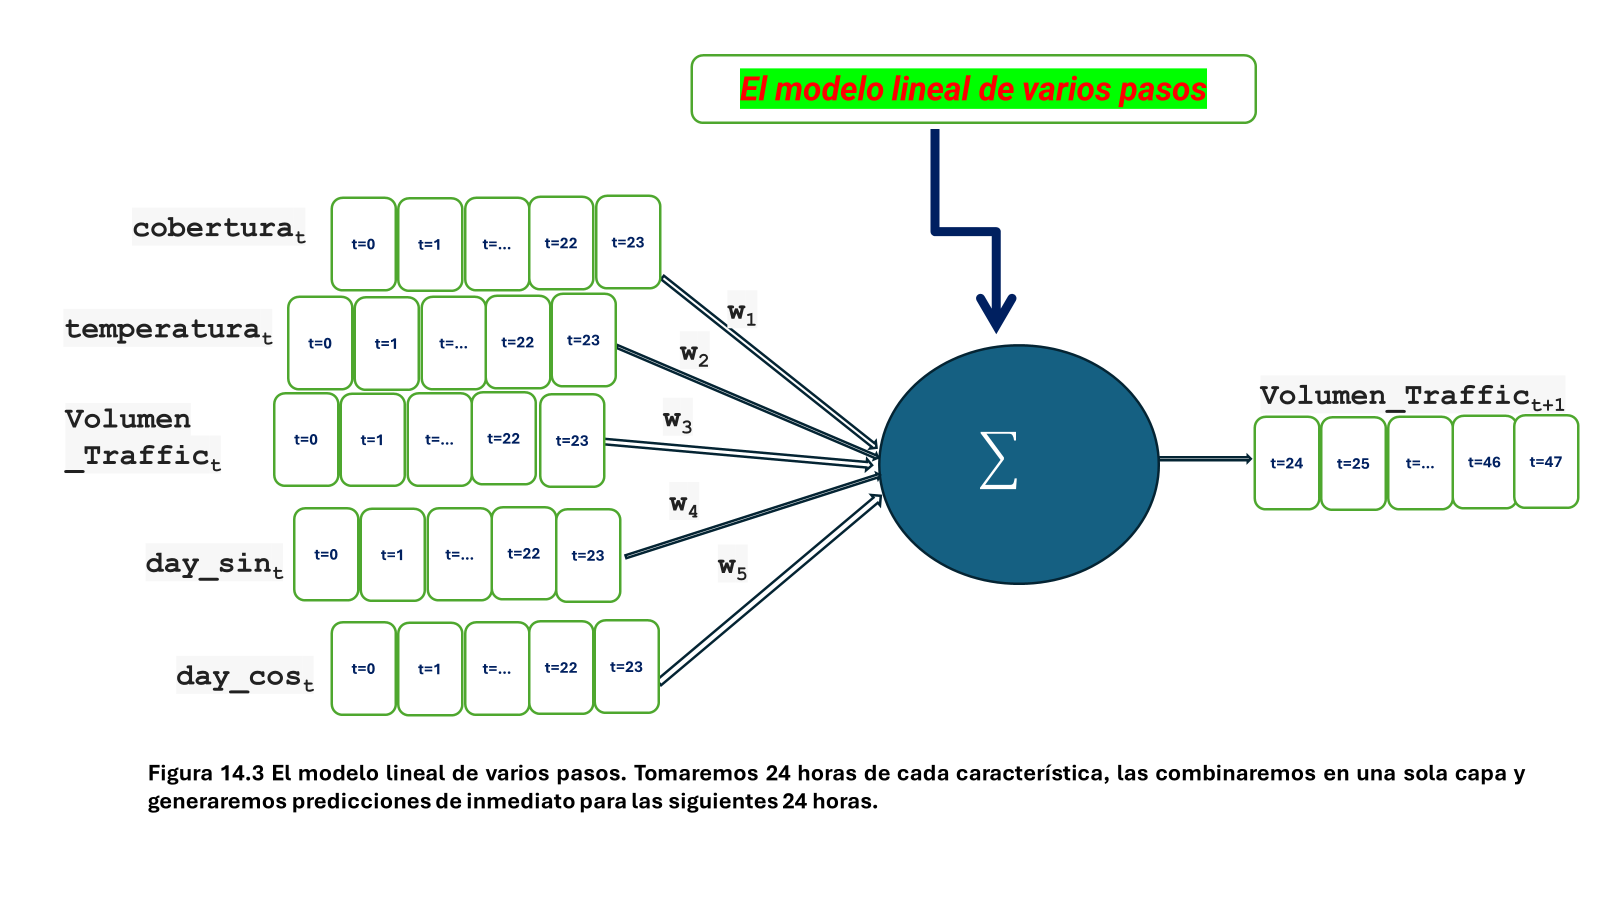

### **Paso 25. Implementación de un modelo lineal de múltiples pasos**

+ Acabamos de crear un modelo lineal de varios pasos.
+ Puede que te sientas decepcionado, ya que el código es casi idéntico al del modelo lineal de un solo paso.
+ Esto se debe a nuestro trabajo de creación de la clase DataWindow y de la ventana adecuada de nuestros datos.
+ Una vez realizado ese paso, la creación de modelos se vuelve extremadamente fácil.
+ A continuación, implementaremos un modelo lineal de múltiples salidas.

In [ ]:
mo_linear = Sequential([
    Dense(units=2)
])

history = compile_and_fit(mo_linear, mo_single_step_window)

mo_val_performance['Linear'] = mo_linear.evaluate(mo_single_step_window.val)
mo_performance['Linear'] = mo_linear.evaluate(mo_single_step_window.test, verbose=0)

Epoch 1/50
384/384 [==============================] - 2s 5ms/step - loss: 0.1102 - mean_absolute_error: 0.2648 - val_loss: 0.0634 - val_mean_absolute_error: 0.2035
Epoch 2/50
384/384 [==============================] - 4s 9ms/step - loss: 0.0375 - mean_absolute_error: 0.1552 - val_loss: 0.0235 - val_mean_absolute_error: 0.1244
Epoch 3/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0155 - mean_absolute_error: 0.0989 - val_loss: 0.0116 - val_mean_absolute_error: 0.0865
Epoch 4/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0716 - val_loss: 0.0075 - val_mean_absolute_error: 0.0655
Epoch 5/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0577 - val_loss: 0.0059 - val_mean_absolute_error: 0.0548
Epoch 6/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0502 - val_loss: 0.0052 - val_mean_absolute_error: 0.0483
Epoch 7/50
384/3

# **14.1.3. Implementación de un modelo lineal de múltiples salidas**
+ El modelo lineal de múltiples salidas devolverá predicciones para el volumen de tráfico y la temperatura.
+ La entrada es el intervalo de tiempo actual y las predicciones son para el siguiente intervalo de tiempo.
+ La arquitectura del modelo se muestra en la figura 14.4.
+ Allí, puede ver que nuestro modelo lineal de múltiples salidas tomará todas las características en t = 0, las combinará en una sola capa y generará como salida tanto la temperatura como el volumen de tráfico en el siguiente intervalo de tiempo.

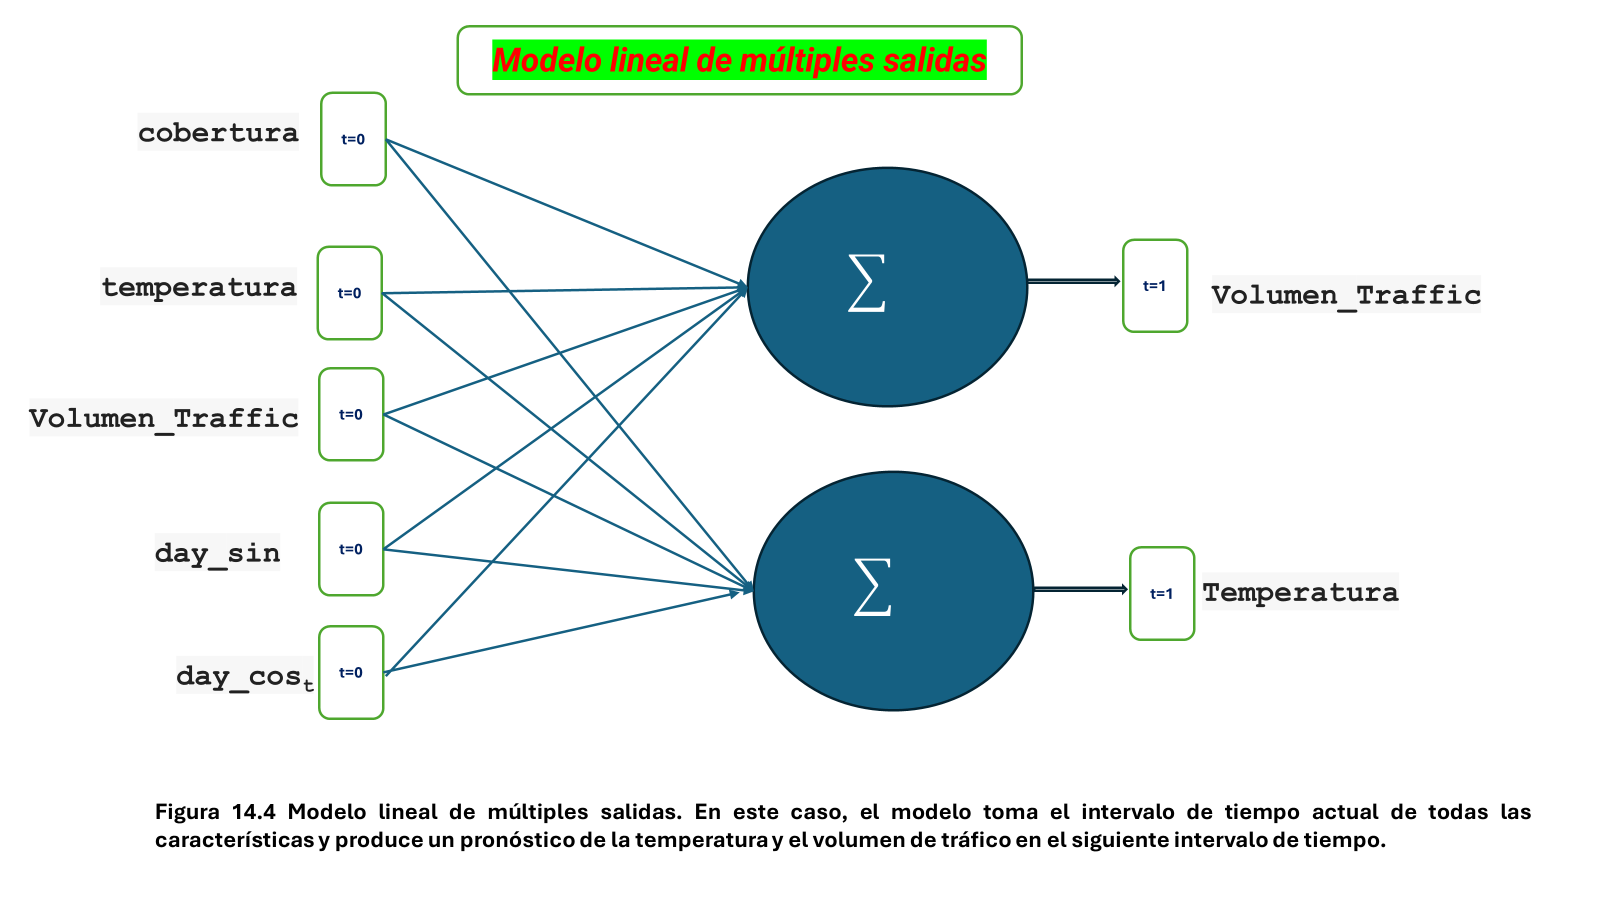

### **Paso 26. Implementación de un modelo lineal de múltiples salidas**
+ Hasta este punto, solo hemos predicho el volumen de tráfico, lo que significa que solo teníamos un objetivo, por lo que usamos la capa Dense(units=1).
+ En este caso, dado que debemos generar una predicción para dos objetivos, nuestra capa será Dense(units=2).
+ Como antes, entrenaremos el modelo y almacenaremos su rendimiento para compararlo más tarde con la línea base y la red neuronal profunda.
+ Nuevamente, puedes ver lo fácil que es construir un modelo de aprendizaje profundo en Keras, especialmente cuando tenemos la ventana de datos adecuada como entrada.
+ Con nuestros *modelos lineales de un solo paso, de varios pasos y de múltiples salidas listos*, ahora podemos avanzar hacia la implementación de una arquitectura más compleja: una red neuronal profunda

In [ ]:
mo_linear = Sequential([
Dense(units=2)
])
history = compile_and_fit(mo_linear, mo_single_step_window)
mo_val_performance['Linear'] = mo_linear.evaluate(mo_single_step_window.val)
mo_performance['Linear'] = mo_linear.evaluate(mo_single_step_window.test,verbose=0)

Epoch 1/50
384/384 [==============================] - 2s 5ms/step - loss: 0.2458 - mean_absolute_error: 0.3836 - val_loss: 0.1493 - val_mean_absolute_error: 0.3060
Epoch 2/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0979 - mean_absolute_error: 0.2440 - val_loss: 0.0678 - val_mean_absolute_error: 0.2024
Epoch 3/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0451 - mean_absolute_error: 0.1604 - val_loss: 0.0333 - val_mean_absolute_error: 0.1359
Epoch 4/50
384/384 [==============================] - 4s 10ms/step - loss: 0.0235 - mean_absolute_error: 0.1097 - val_loss: 0.0195 - val_mean_absolute_error: 0.0993
Epoch 5/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0830 - val_loss: 0.0140 - val_mean_absolute_error: 0.0798
Epoch 6/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0689 - val_loss: 0.0113 - val_mean_absolute_error: 0.0684
Epoch 7/50
384/

# **14.2. Implementación de una red neuronal profunda**
+ Una vez implementados nuestros tres tipos de modelos lineales, es hora de pasar a las redes neuronales profundas.
+ Se ha demostrado empíricamente que agregar capas ocultas en las redes neuronales ayuda a lograr mejores resultados.
+ Además, *introduciremos una función de activación no lineal para capturar relaciones no lineales en los datos*.
+ Los modelos lineales no tienen capas ocultas; el modelo tenía una capa de entrada y una capa de salida.
+ En una red neuronal profunda **(DNN)**, agregaremos más capas entre las capas de entrada y salida, llamadas capas ocultas.
+ Esta diferencia en la arquitectura se destaca en la figura 14.5.
+ ***La idea detrás de agregar capas a la red es que le da al modelo más oportunidades de aprender, lo que generalmente da como resultado que el modelo generalice mejor en datos no vistos, mejorando así su rendimiento.***
+ *Por supuesto, con capas agregadas, el modelo necesariamente se entrena durante más tiempo y, por lo tanto, se supone que aprende mejor.*
+ **Cada círculo en una capa oculta representa una neurona, y cada neurona tiene una función de activación.**
+ La cantidad de neuronas es igual a la cantidad de unidades que se pasan como argumento en la capa densa en Keras.
+ Por lo general, establecemos la cantidad de unidades, o neuronas,
como una potencia de 2, ya que es más eficiente computacionalmente: los cálculos en la CPU y la GPU se realizan en tamaños de lote que también son potencias de 2.


### **Antes de implementar una red neuronal profunda, debemos abordar la función de activación en cada neurona de las capas ocultas.**
+ La función de activación define la salida de cada neurona en función de la entrada.
+ Por lo tanto, si deseamos modelar relaciones no lineales, debemos utilizar una función de activación no lineal.
+ ***La función de activación se encuentra en cada neurona de la red neuronal y es la encargada de generar una salida a partir de los datos de entrada.***
+ *Si se utiliza una función de activación lineal, el modelo solo modelará relaciones lineales.*
+ *Por lo tanto, para modelar relaciones no lineales en los datos, debemos utilizar una función de activación no lineal.*
+ Algunos ejemplos de funciones de activación no lineales son `ReLU, softmax o tanh`.
+ *En nuestro caso, utilizaremos la función de activación de la Unidad Lineal Rectificada (ReLU)*.
+ Esta función de activación no lineal básicamente devuelve la parte positiva de su entrada o 0, como se define en la ecuación 14.2.
+ **Ecuación 14.2**
$$f(x) = x+ = max (0, x)$$
+ Esta función de activación tiene muchas ventajas, como una mejor propagación del gradiente, un cálculo más eficiente y una invariancia de escala.
+ Por todas esas razones, ahora es la función de activación más utilizada en el aprendizaje profundo y la utilizaremos siempre que tengamos una capa densa que sea una capa oculta.
+ Ahora estamos listos para implementar una red neuronal profunda en Keras.

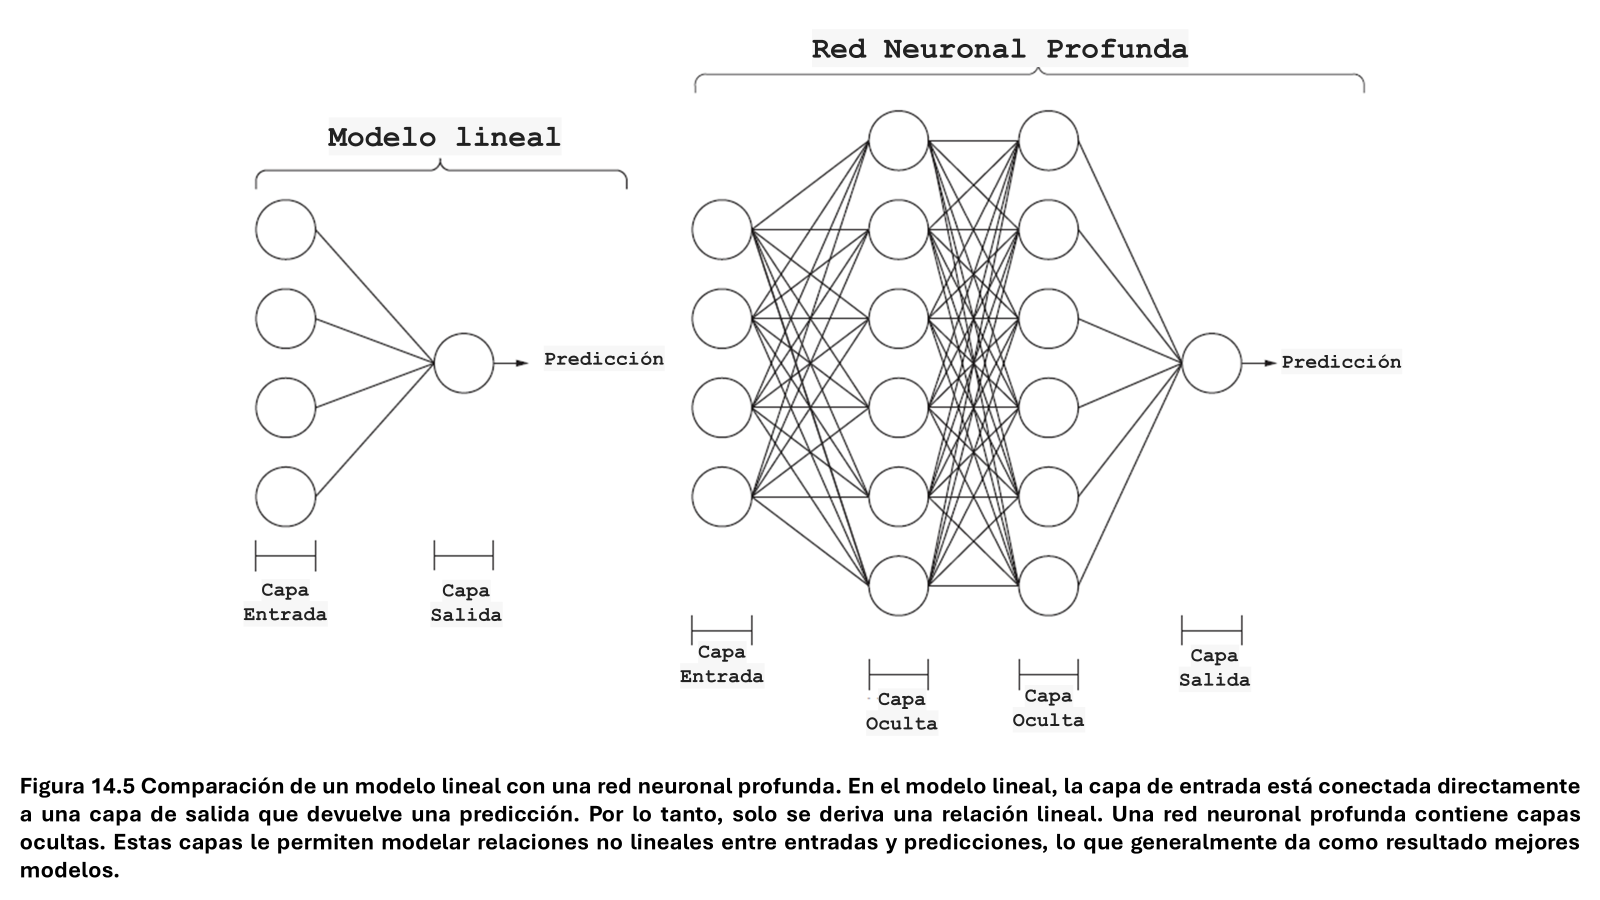

# **14.2.1. Implementación de una red neuronal profunda como un modelo de un solo paso**
+ Ahora volvemos al modelo de un solo paso, pero esta vez implementaremos una red neuronal profunda.
+ La DNN toma las características en el paso de tiempo actual para generar la predicción del volumen de tráfico en el siguiente paso de tiempo.
+ El modelo aún hace uso del modelo secuencial, ya que apilaremos capas densas para construir una red neuronal profunda.
+ **En este caso, usaremos dos capas ocultas con 64 neuronas cada una.**
+ *Como se mencionó anteriormente, especificaremos que la función de activación sea ReLU.*
+ La última capa es la capa de salida, que en este caso solo devuelve un valor que representa la predicción del volumen de tráfico.

### **Paso 27. Implementación de una red neuronal profunda como un modelo de un solo paso**
+ Primera capa oculta con 64 neuronas. Especifique que la función de activación sea ReLU.
+ La capa de salida tiene solo una neurona, ya que solo generamos un valor.
+ Con el modelo definido, ahora podemos compilarlo, entrenarlo y registrar su rendimiento para compararlo con la línea base y el modelo lineal.

In [ ]:
# **Paso 27. Implementación de una red neuronal profunda como un modelo de un solo paso**
dense = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
384/384 [==============================] - 3s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0723 - val_loss: 0.0044 - val_mean_absolute_error: 0.0494
Epoch 2/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0471 - val_loss: 0.0029 - val_mean_absolute_error: 0.0401
Epoch 3/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0417 - val_loss: 0.0028 - val_mean_absolute_error: 0.0396
Epoch 4/50
384/384 [==============================] - 4s 10ms/step - loss: 0.0030 - mean_absolute_error: 0.0398 - val_loss: 0.0028 - val_mean_absolute_error: 0.0402
Epoch 5/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0380 - val_loss: 0.0021 - val_mean_absolute_error: 0.0327
Epoch 6/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0370 - val_loss: 0.0021 - val_mean_absolute_error: 0.0333
Epoch 7/50
384/

### **Paso 28. Implementación de una red neuronal profunda como un modelo de un solo paso - Predicciones**
+ Por supuesto, podemos echar un vistazo a las predicciones del modelo utilizando el método de gráficos, como se muestra en la figura 14.6. Nuestra red neuronal profunda parece estar haciendo predicciones bastante precisas.

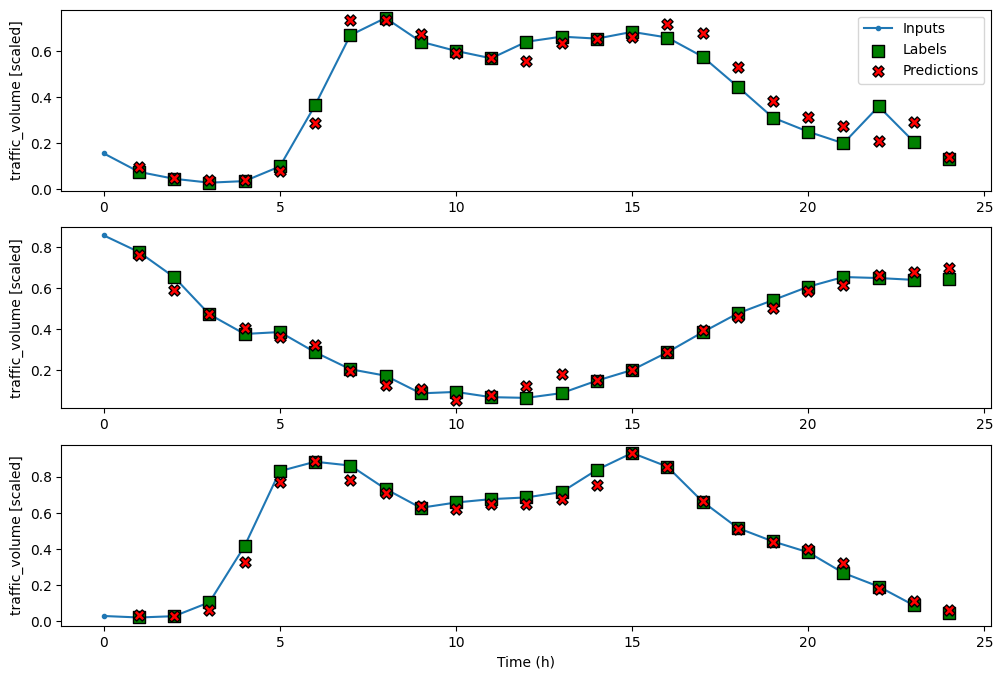

In [ ]:
wide_window.plot(dense)

plt.savefig('figures', dpi=300)

+ **Figura 14.6 Predicción del volumen de tráfico utilizando una red neuronal profunda como modelo de un solo paso. Aquí, incluso más predicciones (mostradas como cruces) se superponen con los valores reales (mostrados como cuadrados), lo que sugiere que el modelo está haciendo predicciones muy precisas.**

### **Paso 29. Grafico de los Errores MAE - DNN vs Modeleo Baeline**
+ Comparemos el MAE de la DNN con el modelo lineal y la línea base que construimos en el capítulo 13.
+ El resultado se muestra en la figura 14.7.

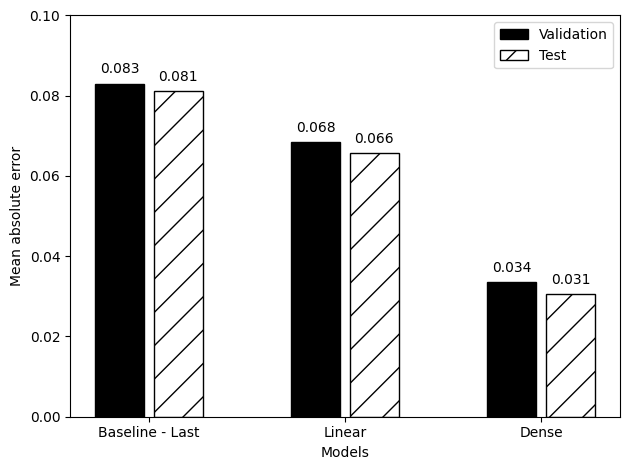

In [ ]:
mae_val = [v[1] for v in val_performance.values()]
mae_test = [v[1] for v in performance.values()]

x = np.arange(len(performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.1)
plt.xticks(ticks=x, labels=performance.keys())
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **Figura 14.7 El MAE de todos los modelos de un solo paso hasta el momento. El modelo lineal tiene un mejor rendimiento que el modelo de referencia, que solo predice el último valor conocido. El modelo denso supera a ambos modelos, ya que tiene el MAE más bajo.**

# **14.2.2. Implementación de una red neuronal profunda como un modelo de varios pasos**
+ Ahora, implementemos una red neuronal profunda como un modelo de varios pasos.
+ En este caso, queremos predecir el volumen de tráfico de las próximas 24 horas en función de las últimas 24 horas de datos registrados.
+ Nuevamente, utilizaremos dos capas ocultas con 64 neuronas cada una y utilizaremos la función de activación ReLU.
+ Dado que tenemos una ventana de datos con 24 horas de entrada, el modelo también generará 24 horas de predicciones; la capa de salida simplemente tiene una neurona porque solo estamos prediciendo el volumen de tráfico.

### **Paso 30. Implementación de una red neuronal profunda como un modelo de varios pasos**

In [ ]:
ms_dense = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

history = compile_and_fit(ms_dense, multi_window)

ms_val_performance['Dense'] = ms_dense.evaluate(multi_window.val)
ms_performance['Dense'] = ms_dense.evaluate(multi_window.test, verbose=0)

Epoch 1/50
383/383 [==============================] - 5s 9ms/step - loss: 0.0289 - mean_absolute_error: 0.1082 - val_loss: 0.0157 - val_mean_absolute_error: 0.0828
Epoch 2/50
383/383 [==============================] - 2s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0769 - val_loss: 0.0149 - val_mean_absolute_error: 0.0825
Epoch 3/50
383/383 [==============================] - 3s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0759 - val_loss: 0.0145 - val_mean_absolute_error: 0.0811
Epoch 4/50
383/383 [==============================] - 3s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0755 - val_loss: 0.0140 - val_mean_absolute_error: 0.0803
Epoch 5/50
383/383 [==============================] - 2s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0749 - val_loss: 0.0140 - val_mean_absolute_error: 0.0804
Epoch 6/50
383/383 [==============================] - 3s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0744 - val_loss: 0.0143 - val_mean_absolute_error: 0.0792
Epoch 7/50
383/3

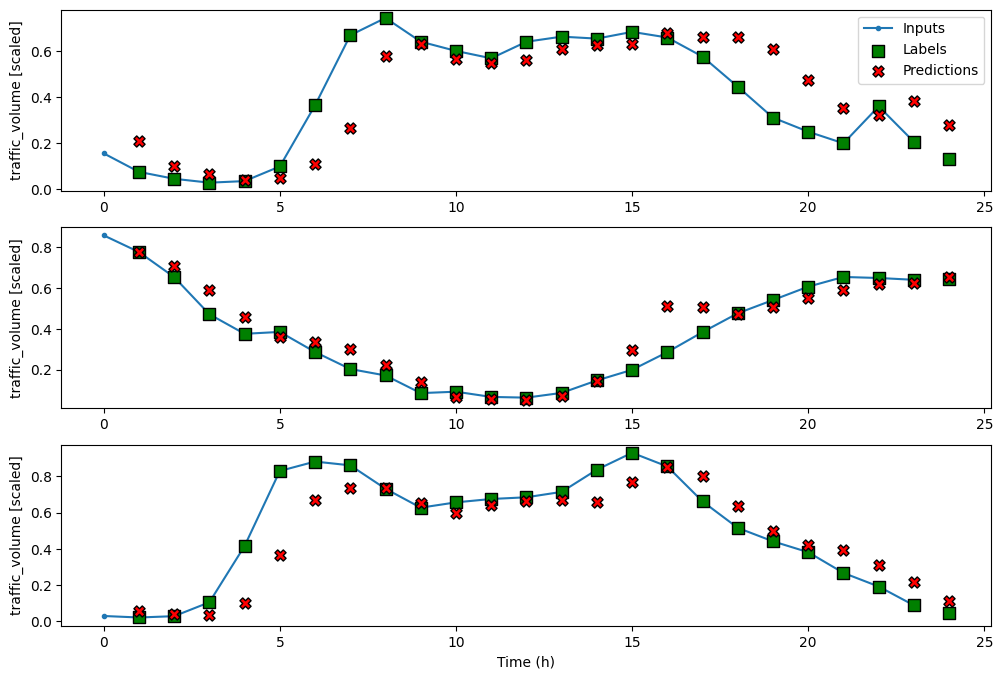

In [ ]:
wide_window.plot(ms_dense)

plt.savefig('figures', dpi=300)

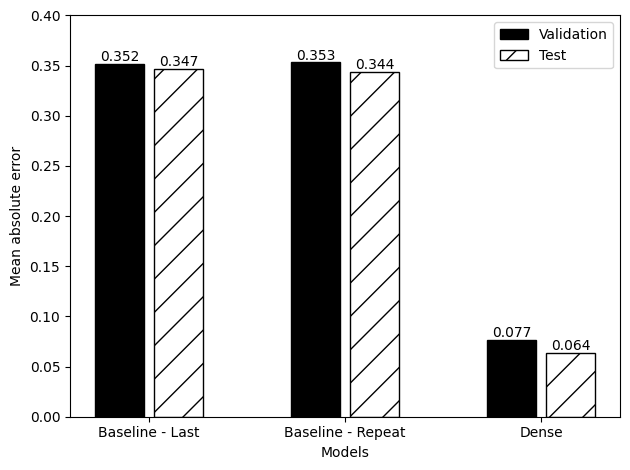

In [ ]:
ms_mae_val = [v[1] for v in ms_val_performance.values()]
ms_mae_test = [v[1] for v in ms_performance.values()]

x = np.arange(len(ms_performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(ms_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

for index, value in enumerate(ms_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.4)
plt.xticks(ticks=x, labels=ms_performance.keys())
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **En la figura 14.8 verá que tanto el modelo lineal como la red neuronal profunda superan las dos líneas base que construimos para la tarea de varios pasos en el capítulo 13. Nuevamente, la red neuronal profunda tiene el MAE más bajo de todos, lo que significa que es el modelo de mayor rendimiento por ahora.**

# **14.2.3. Implementación de una red neuronal profunda como un modelo de múltiples salidas**
+ Por último, implementaremos una red neuronal profunda como un modelo de múltiples salidas.
+ En este caso, utilizaremos las características en el intervalo de tiempo actual para pronosticar tanto el volumen de tráfico como la temperatura en el siguiente intervalo de tiempo.
+ Al igual que en las DNN anteriores que implementamos, utilizaremos dos capas ocultas de 64 neuronas cada una.
+ Esta vez, debido a que estamos pronosticando dos objetivos, nuestra capa de salida tiene dos neuronas o unidades.

# **Paso 31. Implementación de una red neuronal profunda como un modelo de múltiples salidas**

In [ ]:
mo_dense = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=2)
])

history = compile_and_fit(mo_dense, mo_single_step_window)

mo_val_performance['Dense'] = mo_dense.evaluate(mo_single_step_window.val)
mo_performance['Dense'] = mo_dense.evaluate(mo_single_step_window.test, verbose=0)

Epoch 1/50
384/384 [==============================] - 3s 5ms/step - loss: 0.0230 - mean_absolute_error: 0.0791 - val_loss: 0.0029 - val_mean_absolute_error: 0.0344
Epoch 2/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0324 - val_loss: 0.0019 - val_mean_absolute_error: 0.0282
Epoch 3/50
384/384 [==============================] - 3s 9ms/step - loss: 0.0021 - mean_absolute_error: 0.0290 - val_loss: 0.0015 - val_mean_absolute_error: 0.0255
Epoch 4/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0274 - val_loss: 0.0016 - val_mean_absolute_error: 0.0289
Epoch 5/50
384/384 [==============================] - 2s 4ms/step - loss: 0.0018 - mean_absolute_error: 0.0266 - val_loss: 0.0013 - val_mean_absolute_error: 0.0232
Epoch 6/50
384/384 [==============================] - 2s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0258 - val_loss: 0.0013 - val_mean_absolute_error: 0.0245
Epoch 7/50
384/3

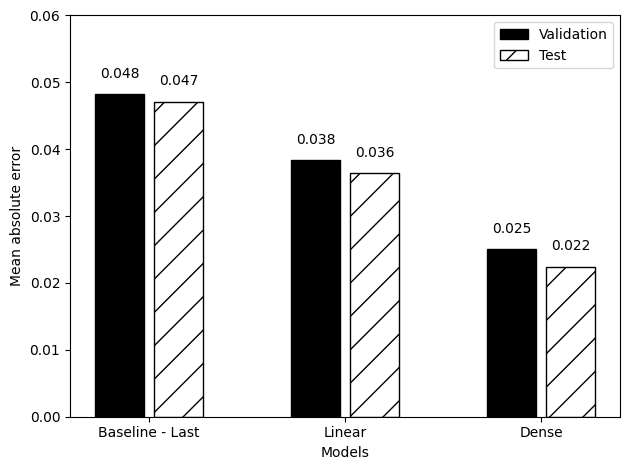

In [ ]:
mo_mae_val = [v[1] for v in mo_val_performance.values()]
mo_mae_test = [v[1] for v in mo_performance.values()]

x = np.arange(len(mo_performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, mo_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mo_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mo_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

for index, value in enumerate(mo_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.06)
plt.xticks(ticks=x, labels=mo_performance.keys())
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('figures', dpi=300)

# **14.3. Próximos pasos**
+ En este capítulo, implementamos modelos lineales y redes neuronales profundas para realizar predicciones de un solo paso, de varios pasos y de múltiples salidas.
+ En todos los casos, la red neuronal profunda superó a los otros modelos.
+ Este suele ser el caso, ya que las DNN pueden mapear relaciones no lineales entre las características y los objetivos, lo que generalmente conduce a predicciones más precisas.
+ Este capítulo solo rozó la superficie de lo que el aprendizaje profundo puede lograr en el pronóstico de series de tiempo.
+ En el próximo capítulo, exploraremos una arquitectura más compleja: la memoria de corto plazo a largo plazo (LSTM).
+ Esta arquitectura se usa ampliamente para procesar secuencias de datos.
+ Dado que una serie de tiempo es una secuencia de puntos igualmente espaciados en el tiempo, tiene sentido aplicar una LSTM para el pronóstico de series de tiempo.
+ Luego, probaremos si la LSTM supera a la DNN o no.

# **Resumen**
+ Un modelo lineal es la arquitectura más simple en el aprendizaje profundo. Tiene una capa de entrada y una capa de salida, sin función de activación.
+ Un modelo lineal solo puede derivar relaciones lineales entre las características y el objetivo.
+ Una red neuronal profunda (DNN) tiene capas ocultas, que son capas entre las capas de entrada y salida. Agregar más capas generalmente mejora el rendimiento del modelo, ya que le permite más tiempo para entrenar y aprender los datos.
+ Para modelar relaciones no lineales a partir de los datos, debe usar una función de activación no lineal en la red. Algunos ejemplos de funciones de activación no lineal son ReLU, softmax, tanh, sigmoid, etc.
+ La cantidad de neuronas en una capa oculta suele ser una potencia de 2, para que el cálculo sea más eficiente.
+ La unidad lineal rectificada (ReLU) es una función de activación no lineal popular que no varía con la escala y permite un entrenamiento eficiente del modelo.